In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import time
import glob
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [10]:
pd2015 = pd.read_csv('2015.csv')
pd2019 = pd.read_csv('2019.csv')
pd2019 = pd2019.iloc[48:]
pd2022 = pd.read_csv('2022.csv')

pd2015.index = range(len(pd2015)-1, -1, -1)
pd2019.index = range(len(pd2019)-1, -1, -1)
pd2022.index = range(len(pd2022)-1, -1, -1)


print(pd2019.index)

pd2015.reset_index().to_csv('i2015.csv', index=False)
pd2019.reset_index().to_csv('i2019.csv', index=False)
pd2022.reset_index().to_csv('i2022.csv', index=False)

RangeIndex(start=1607, stop=-1, step=-1)


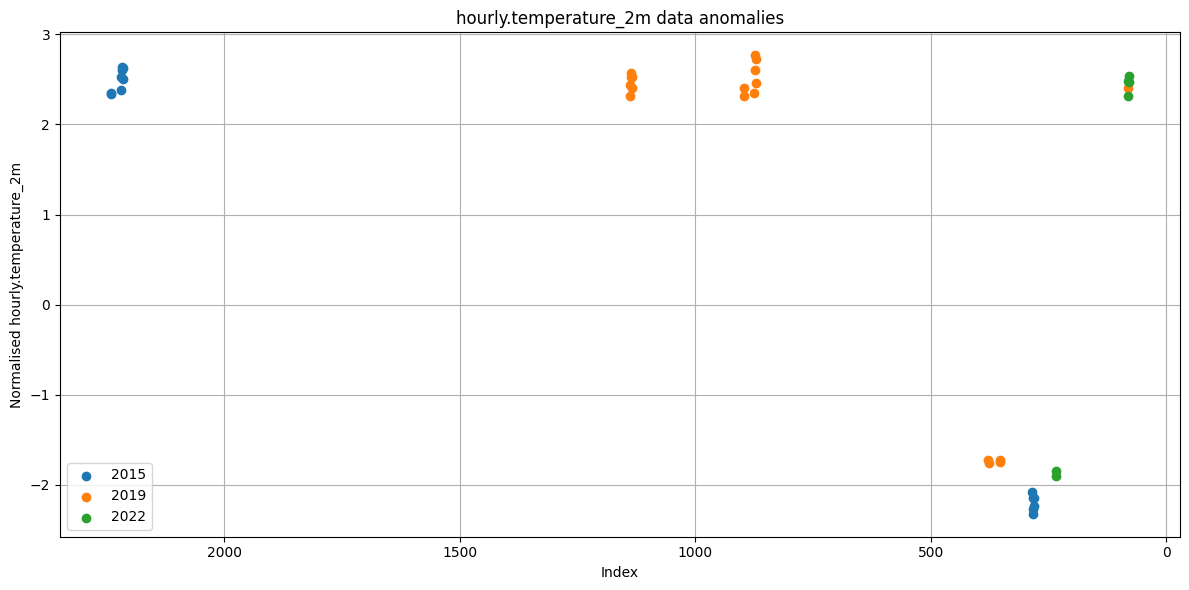

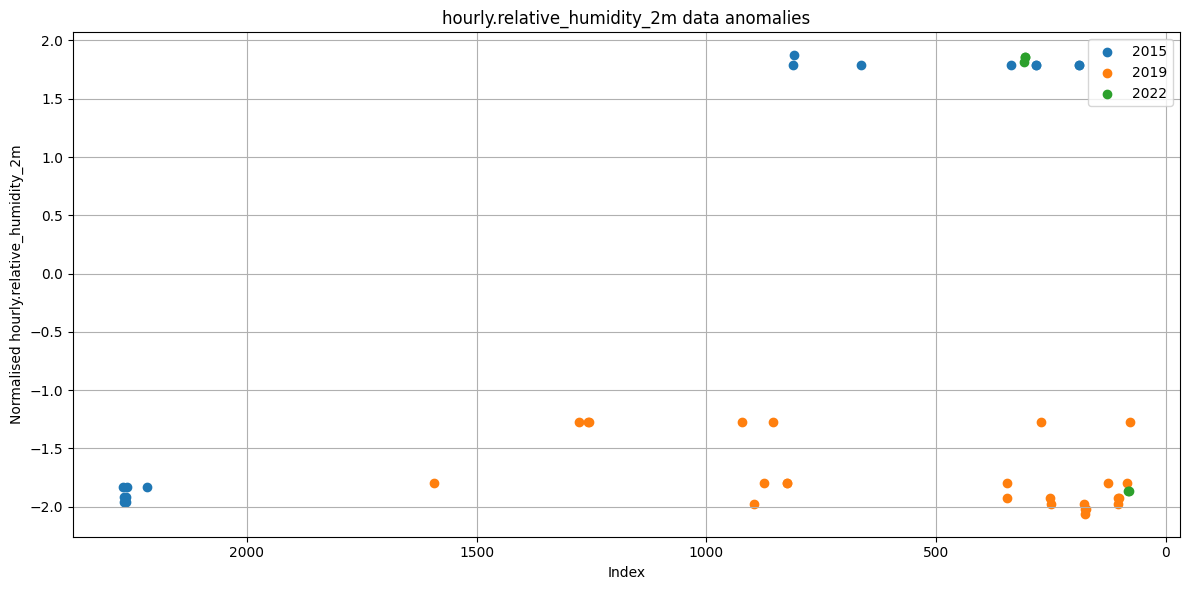

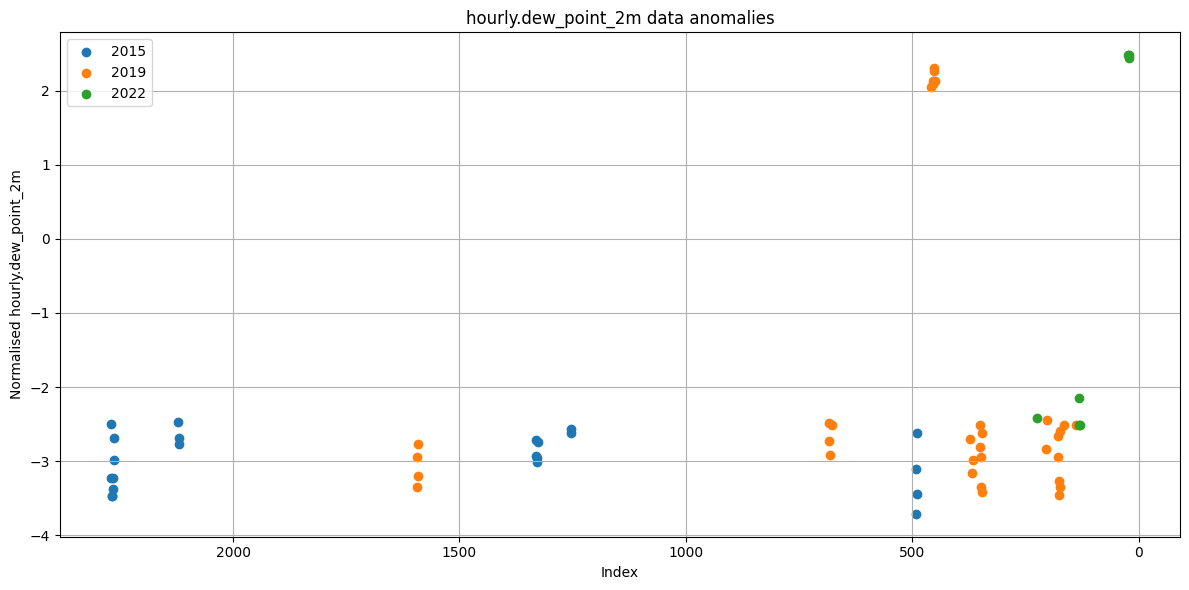

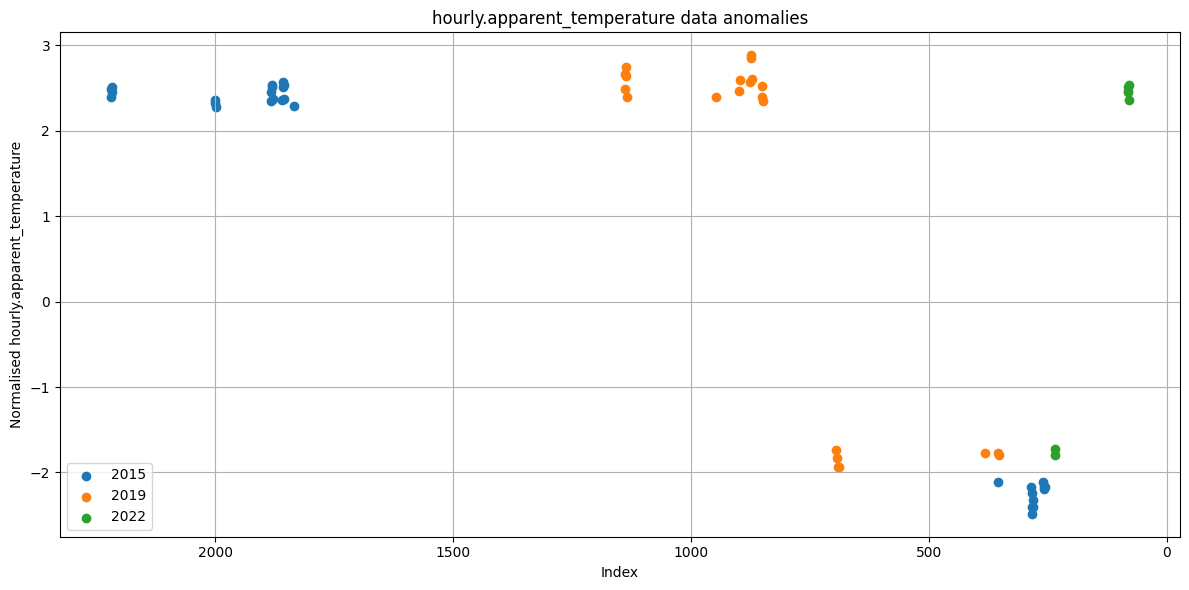

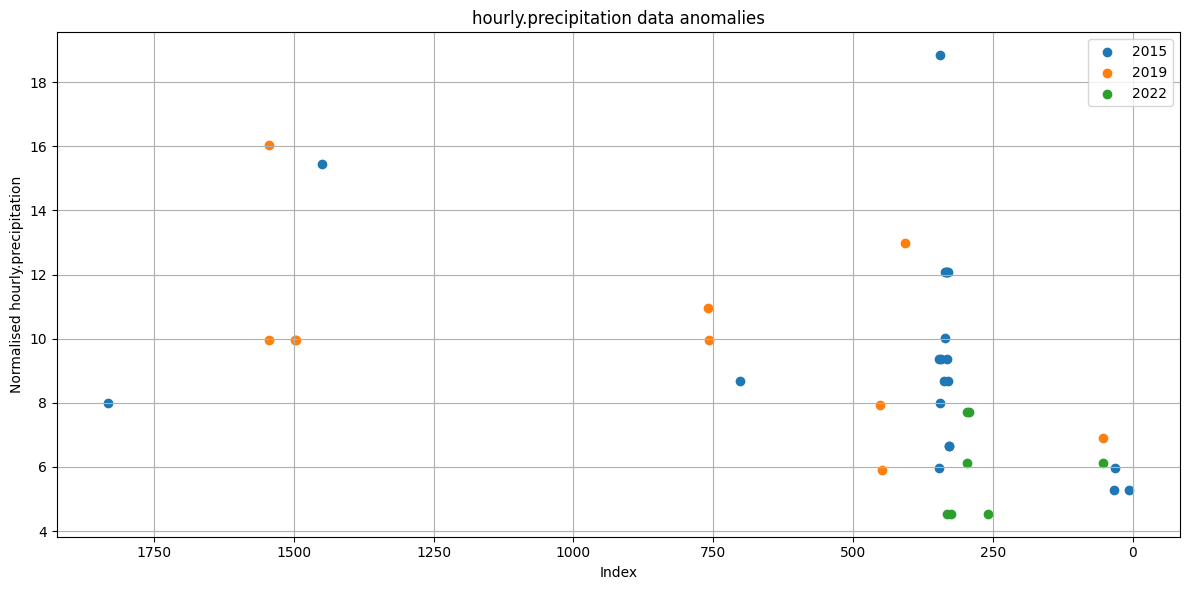

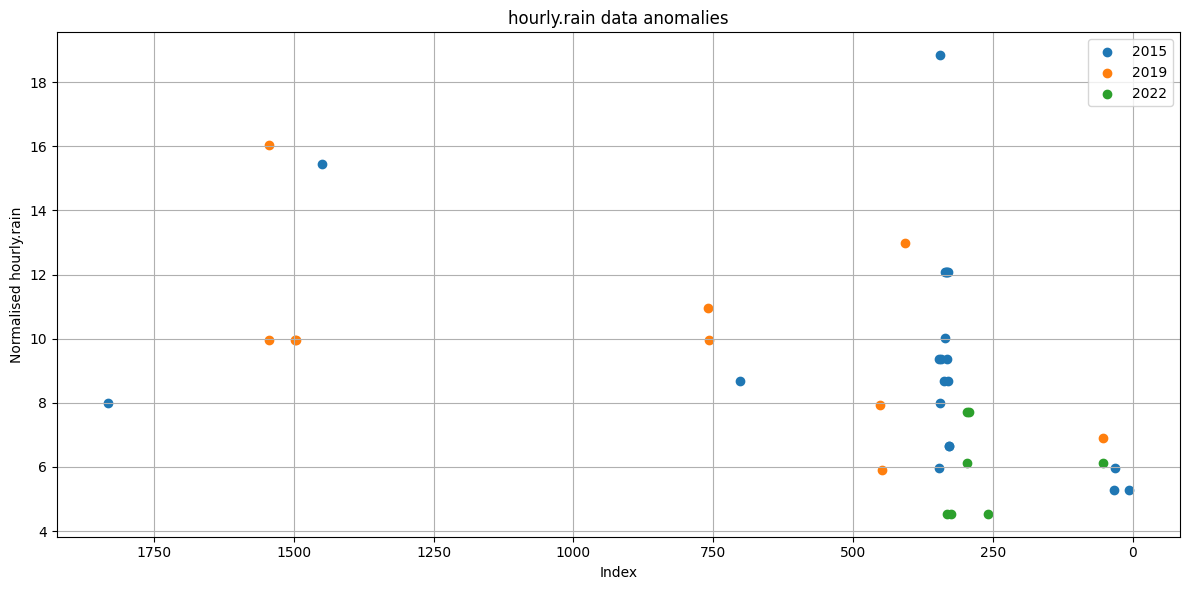

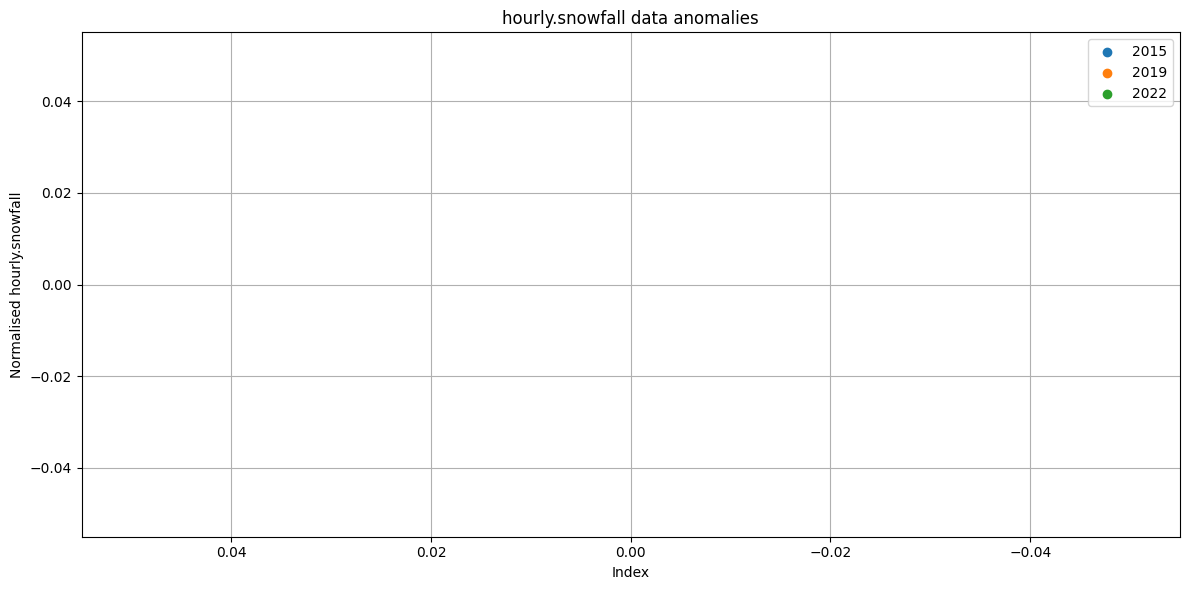

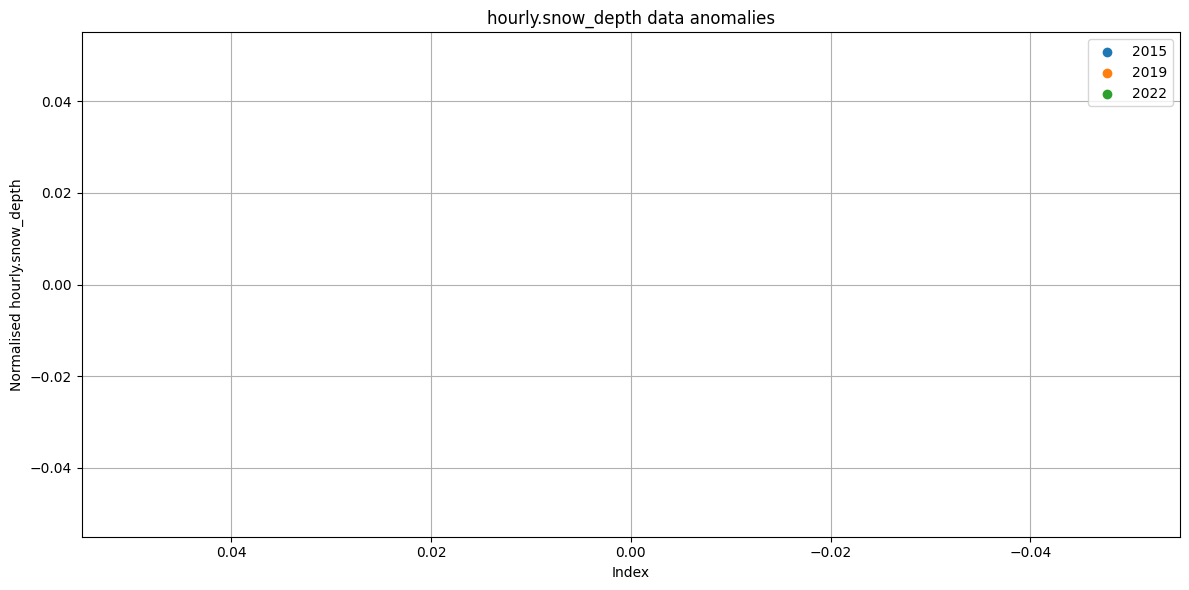

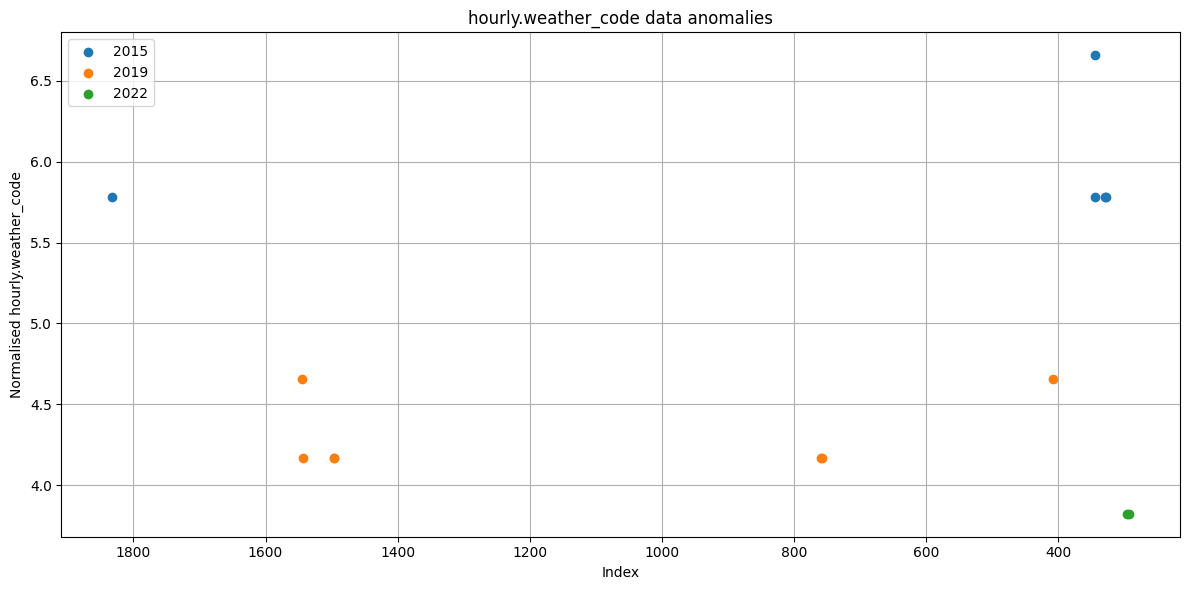

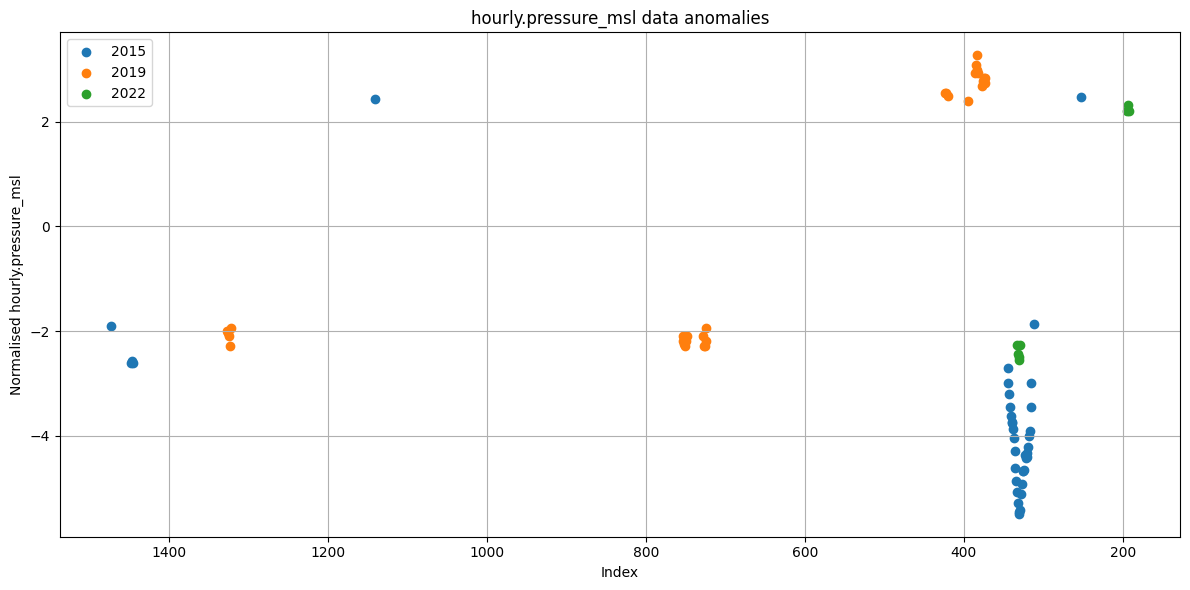

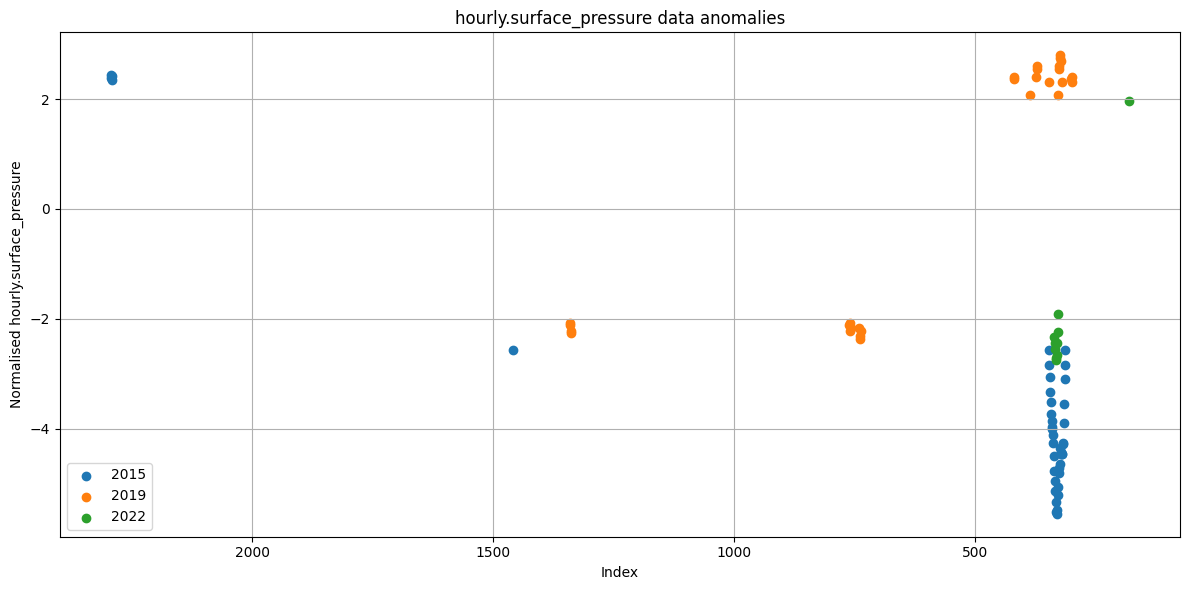

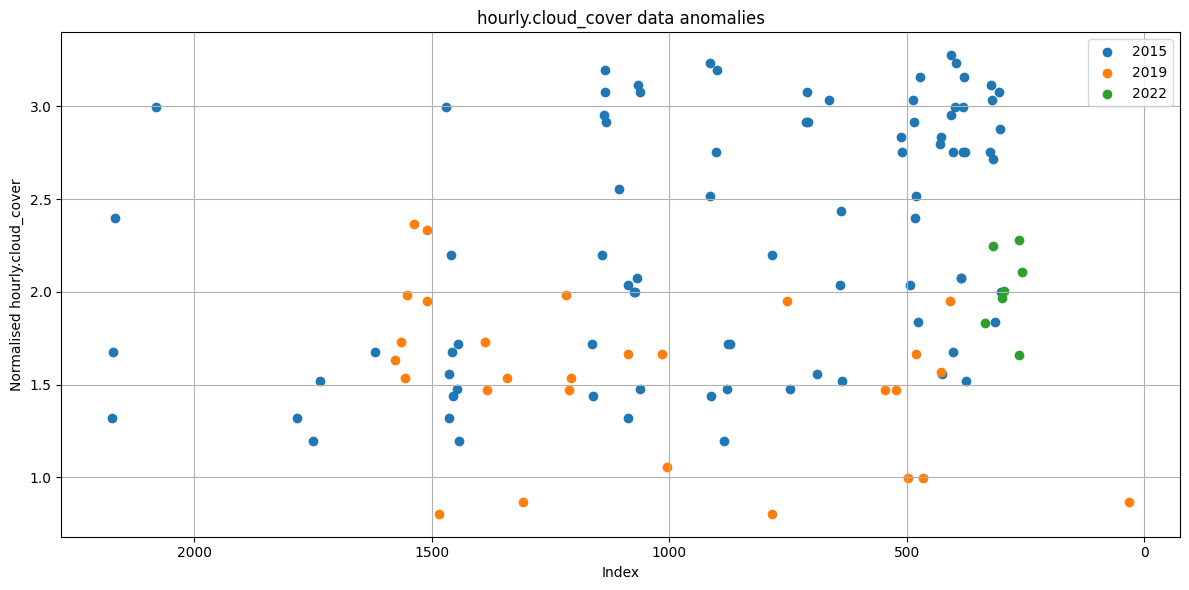

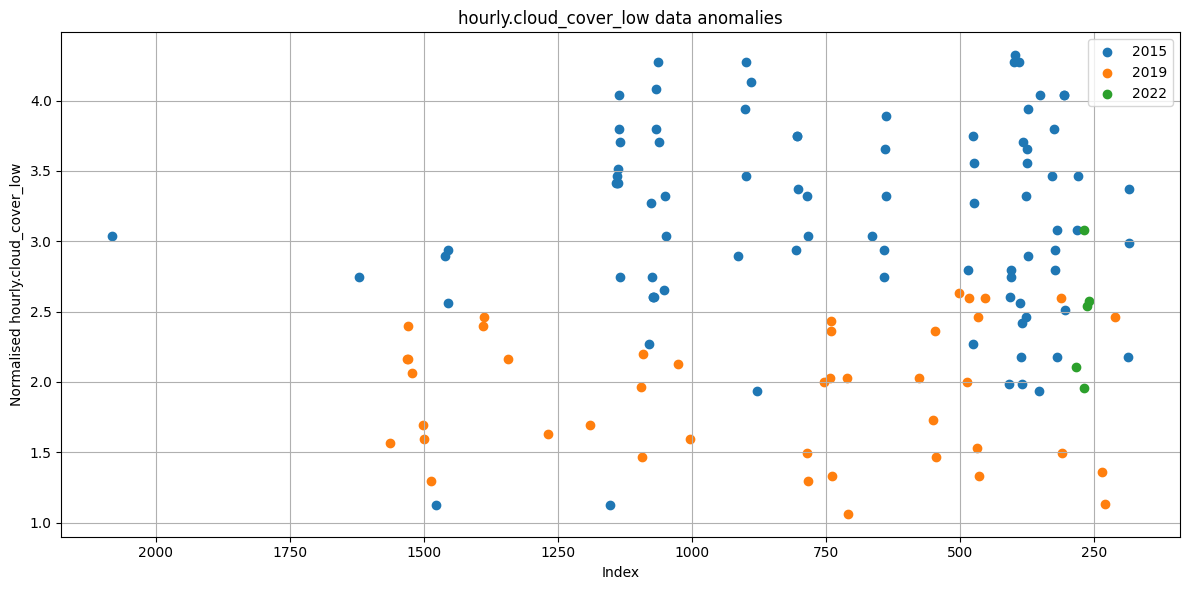

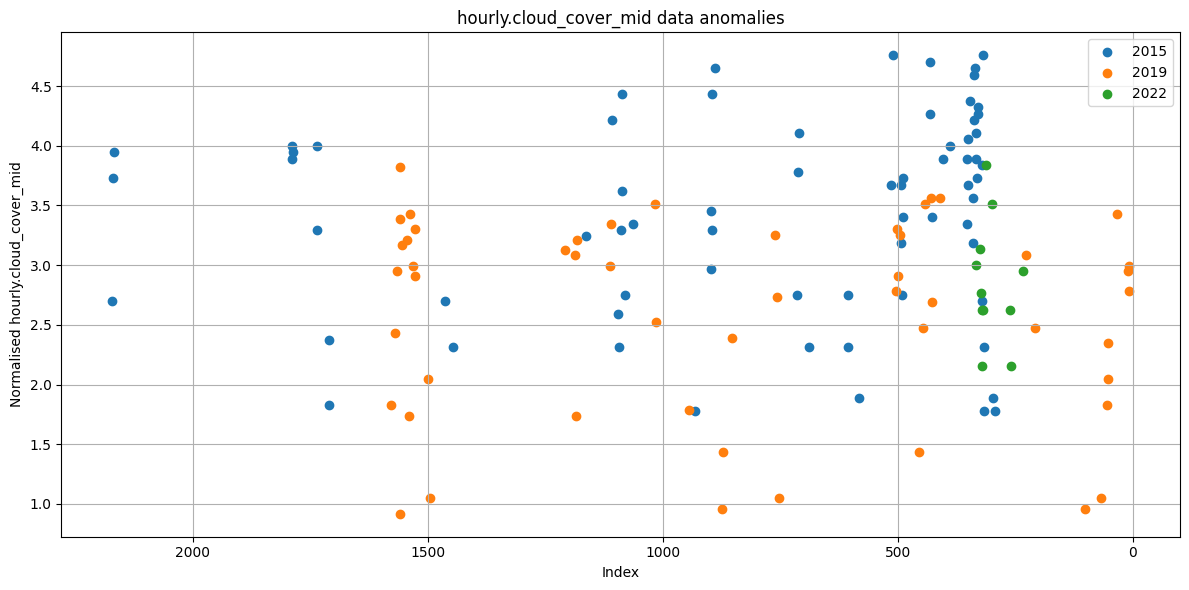

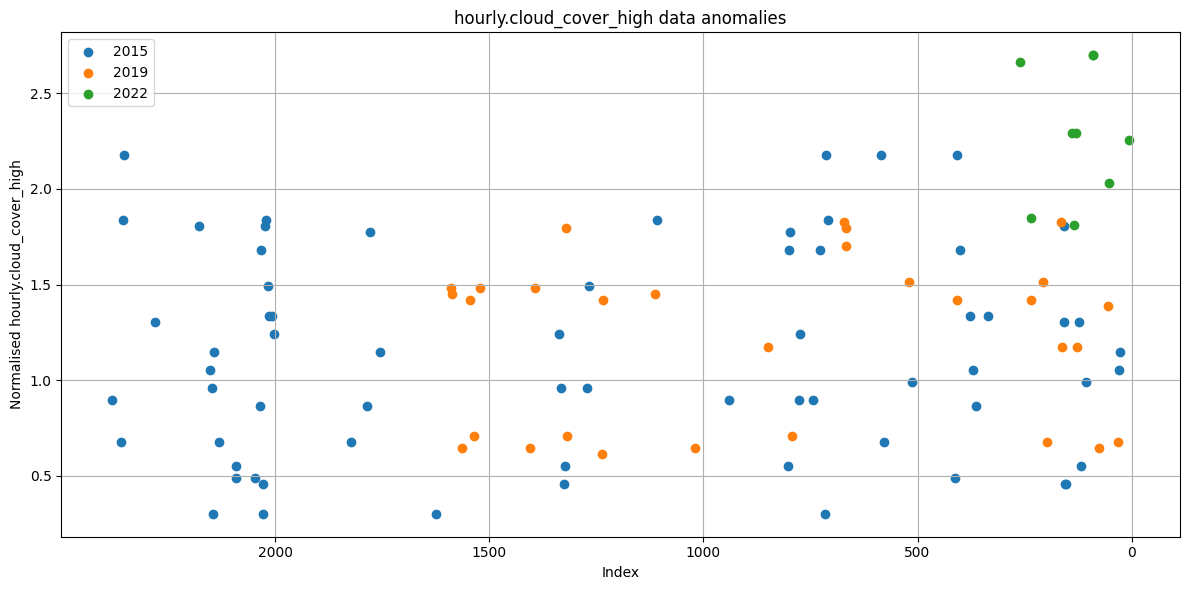

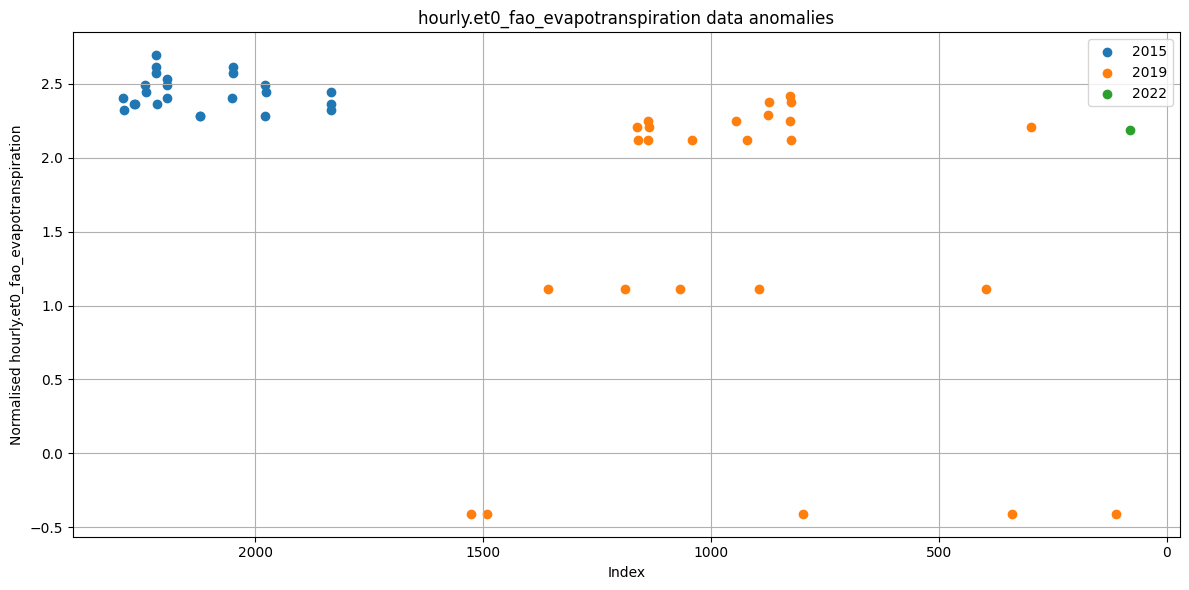

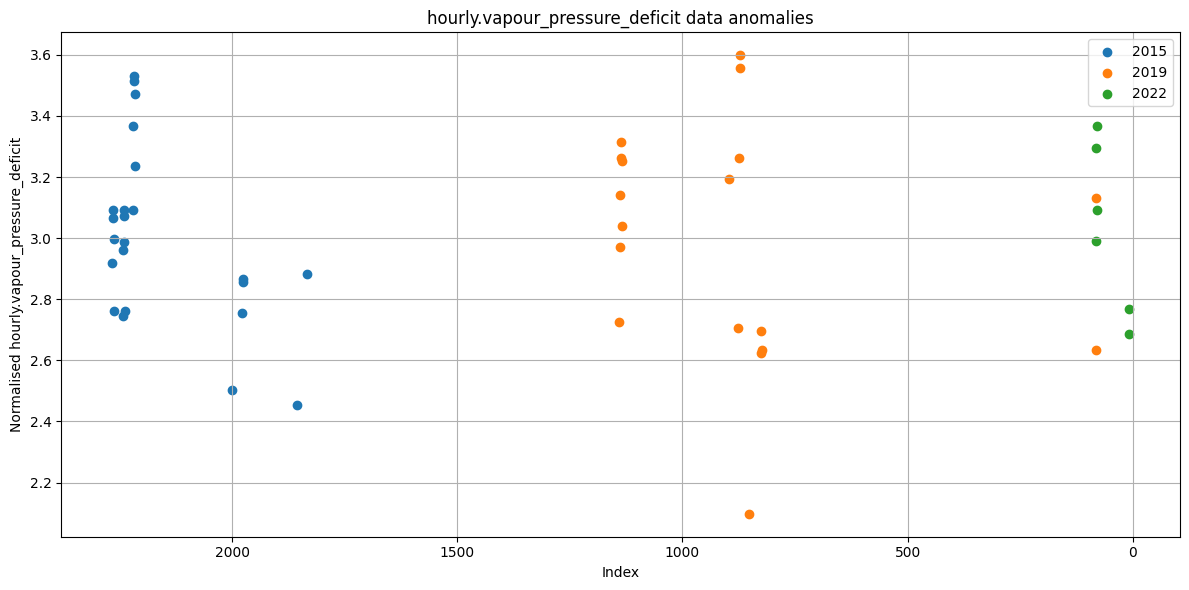

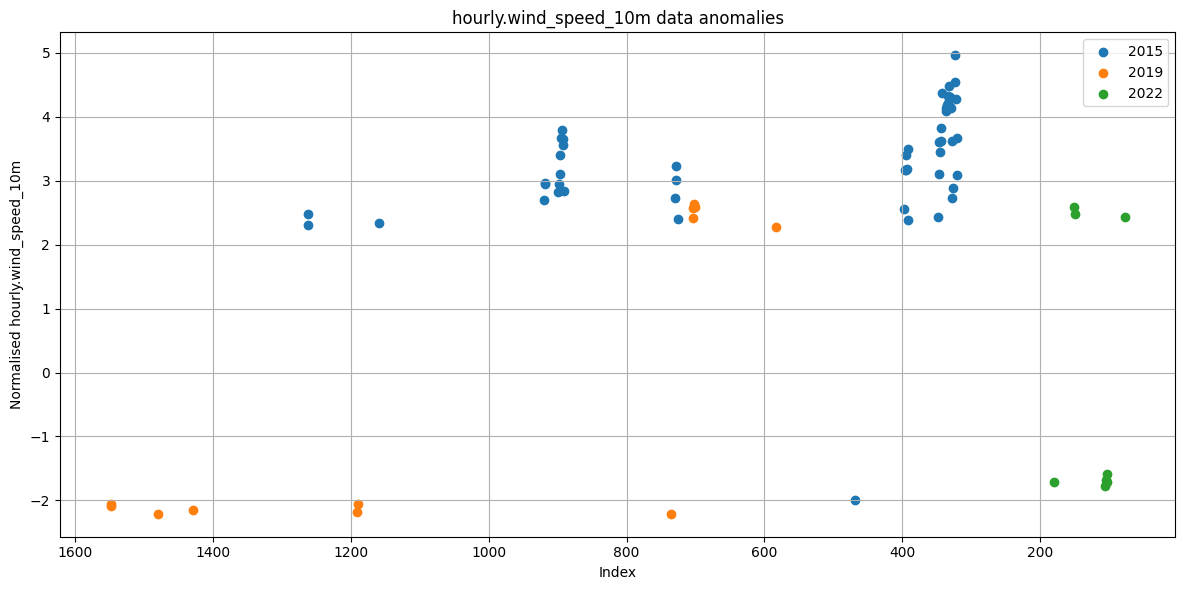

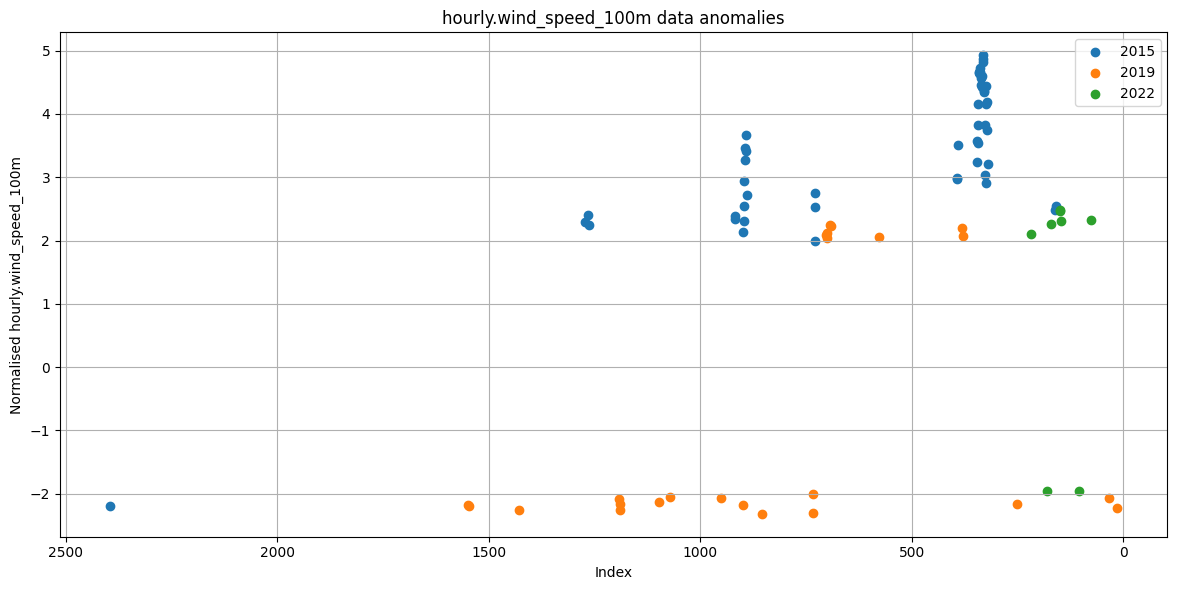

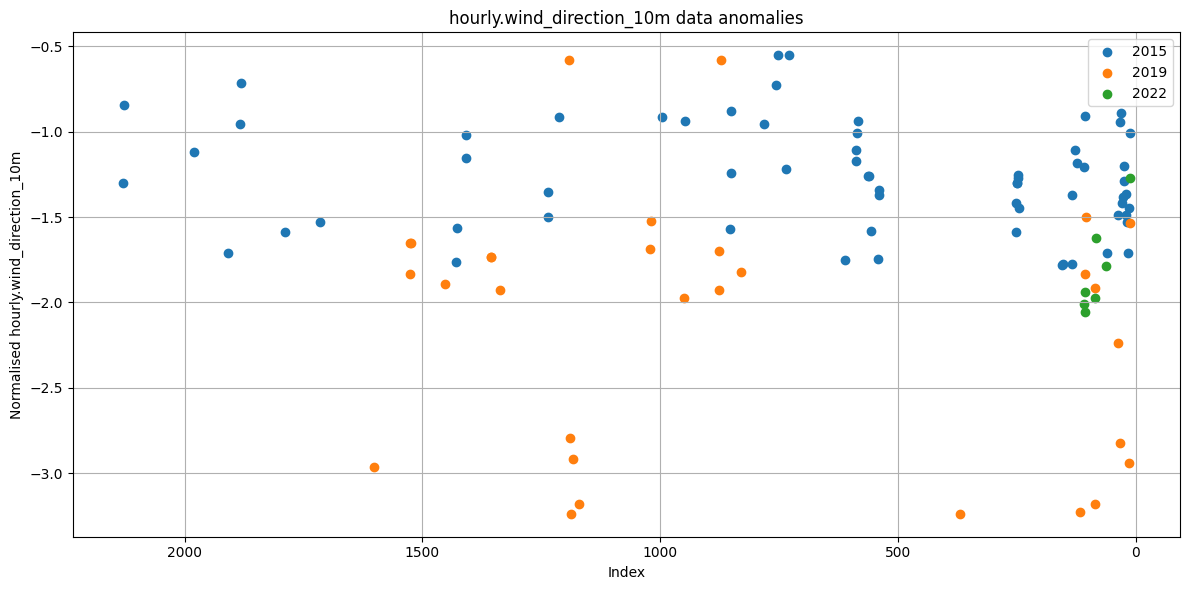

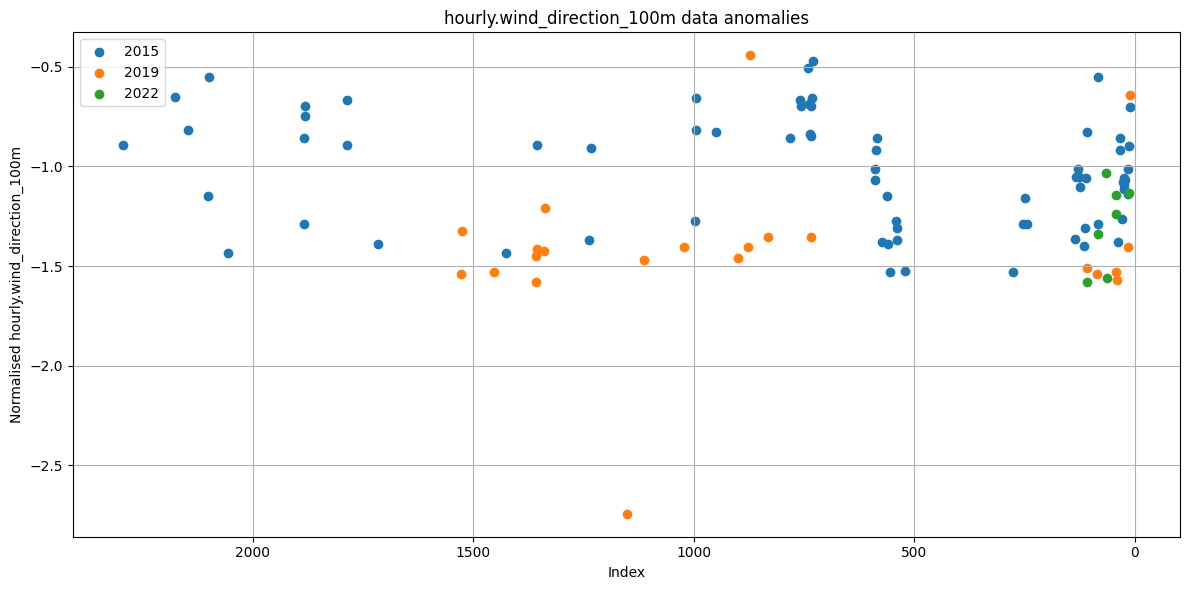

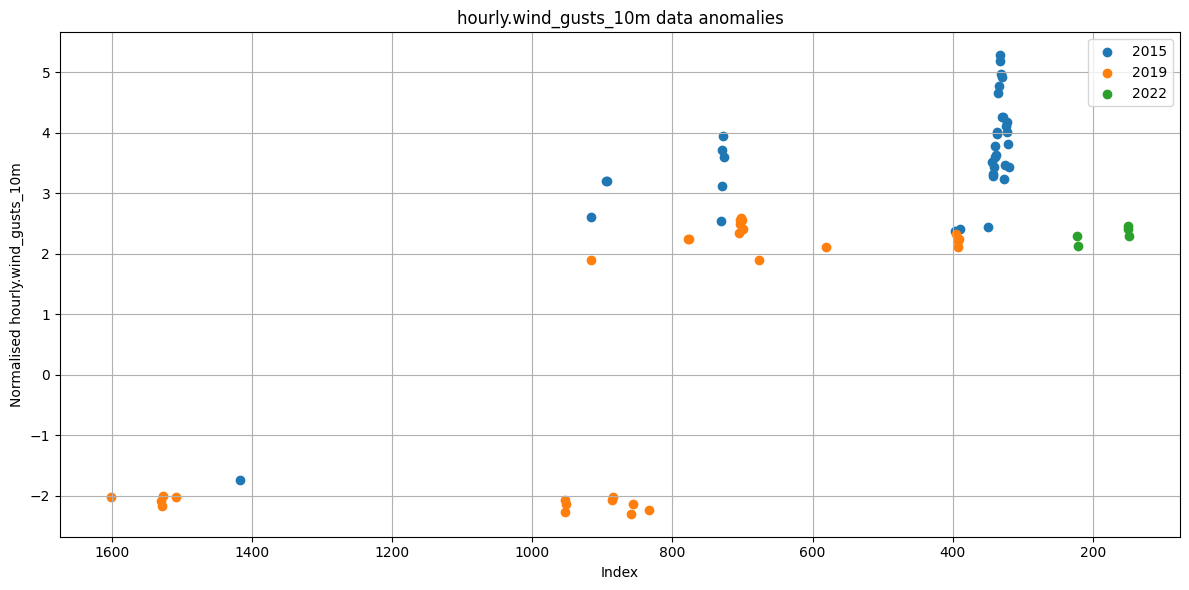

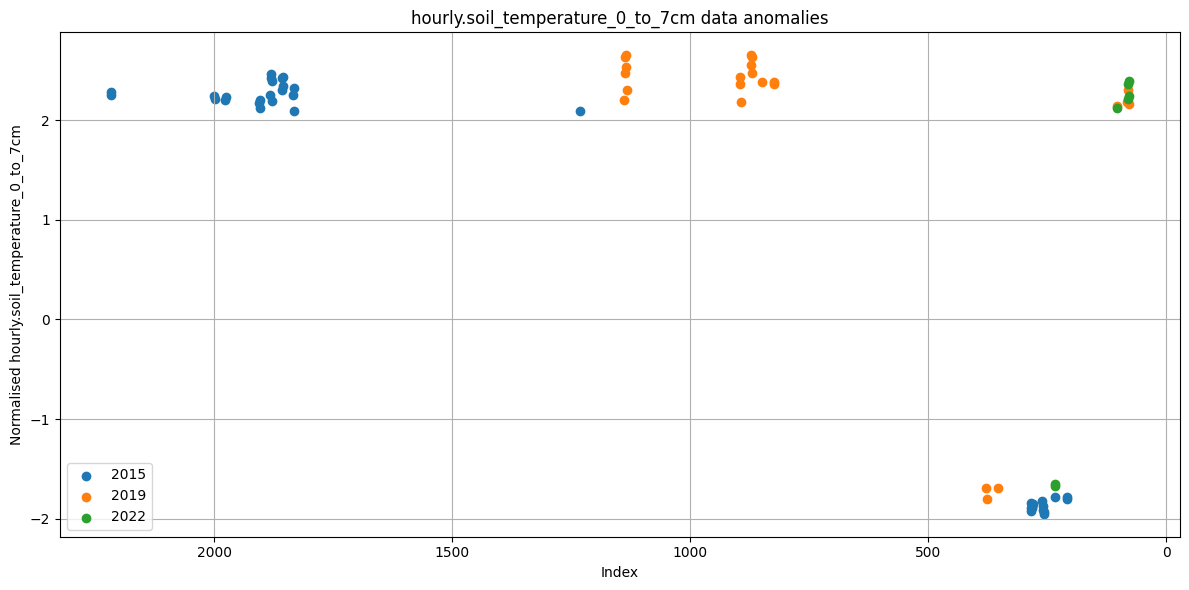

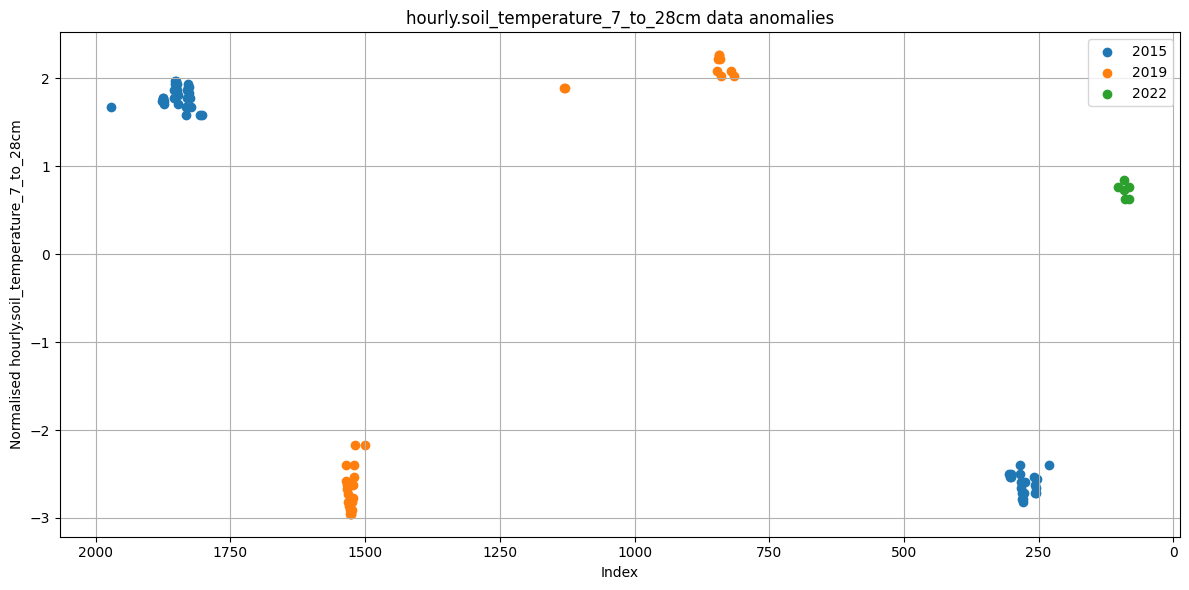

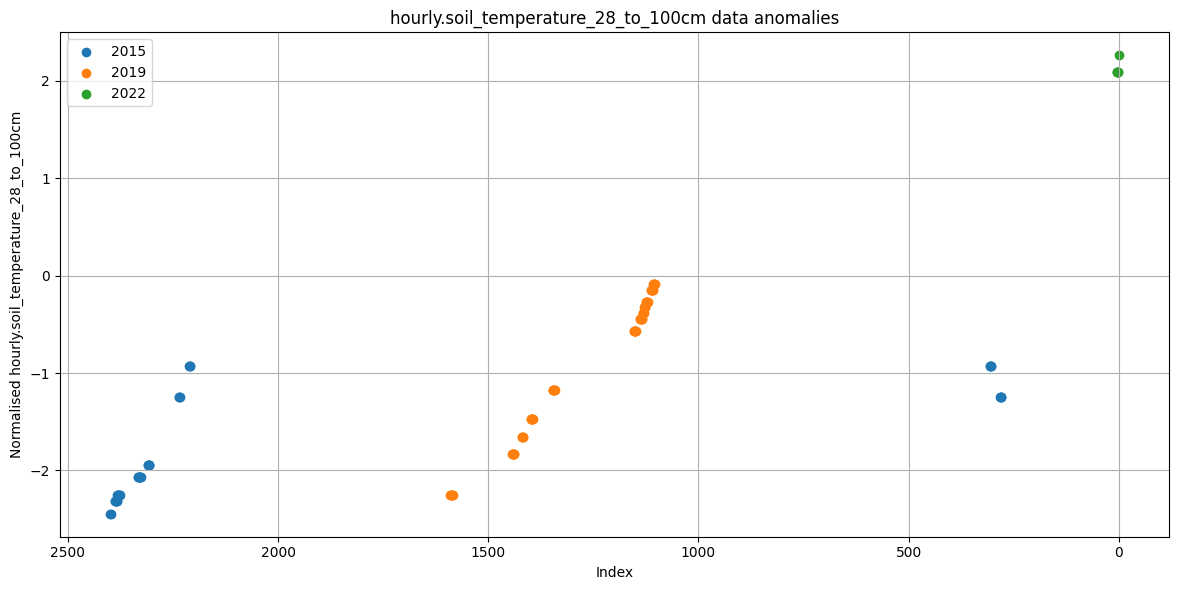

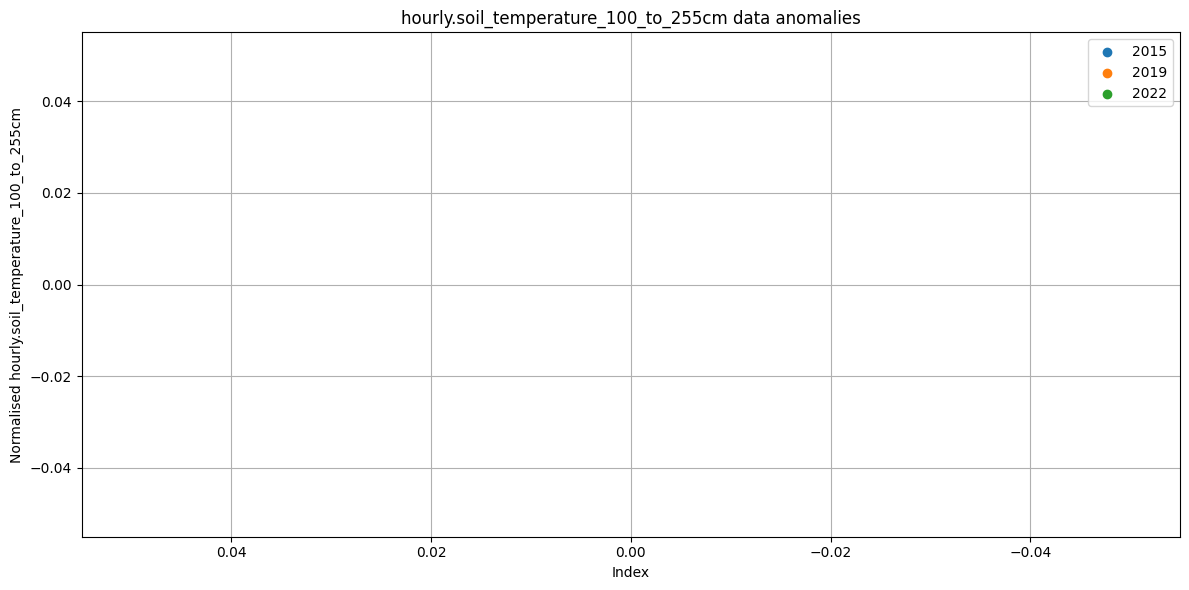

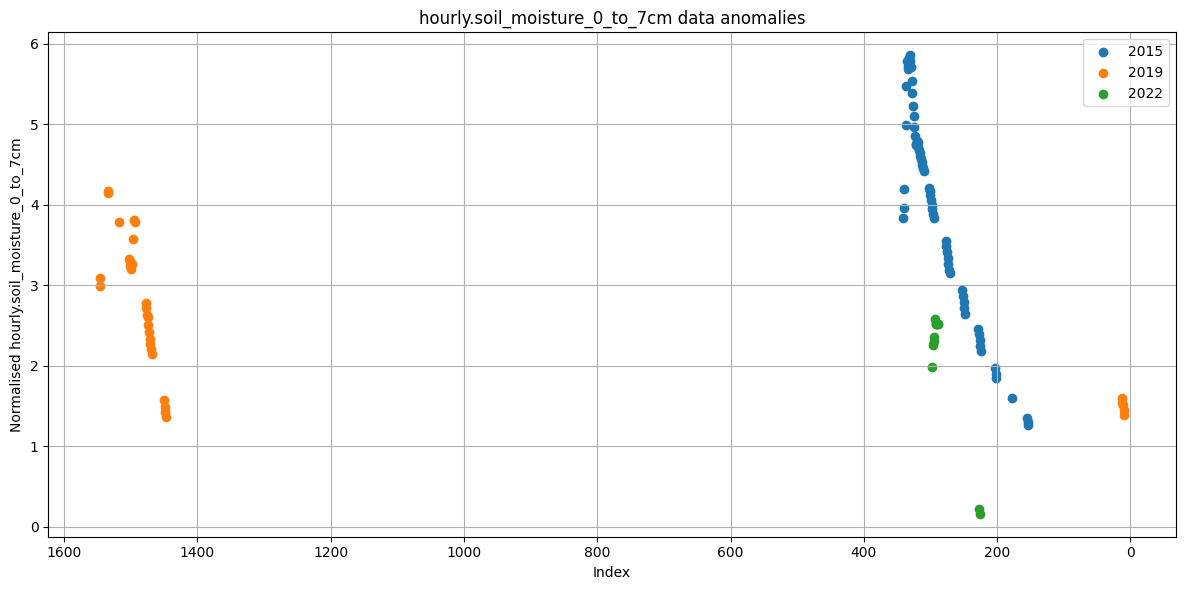

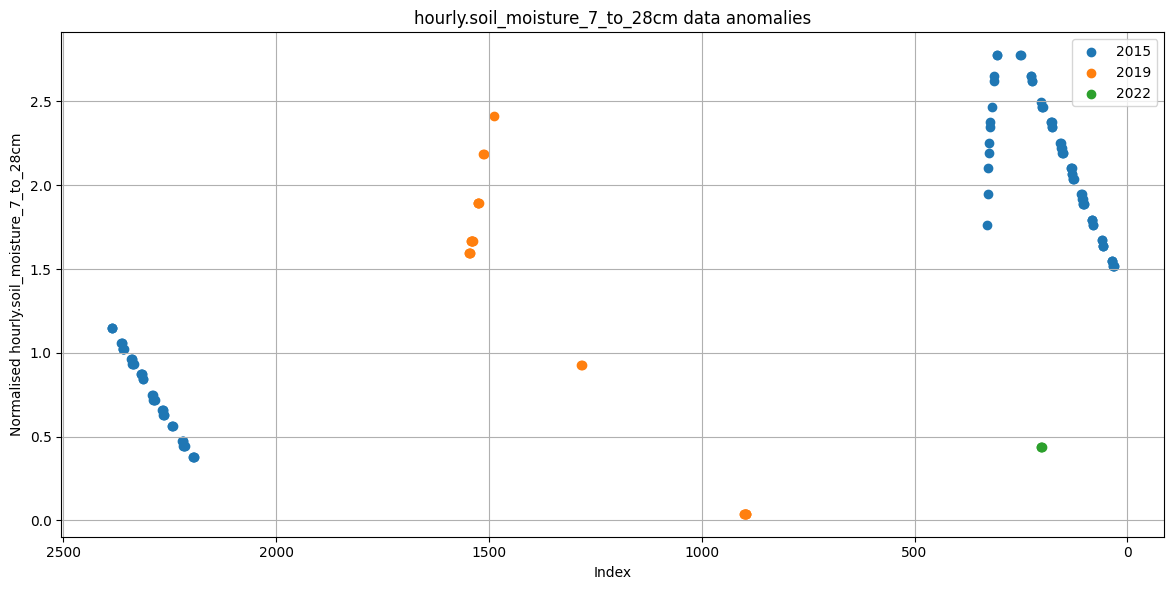

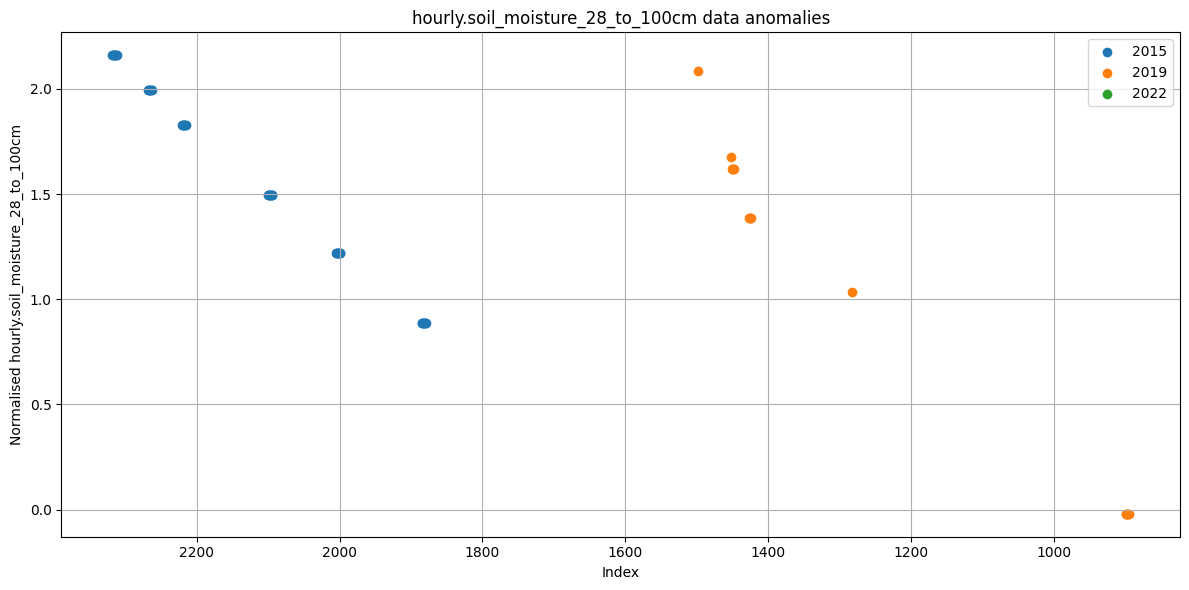

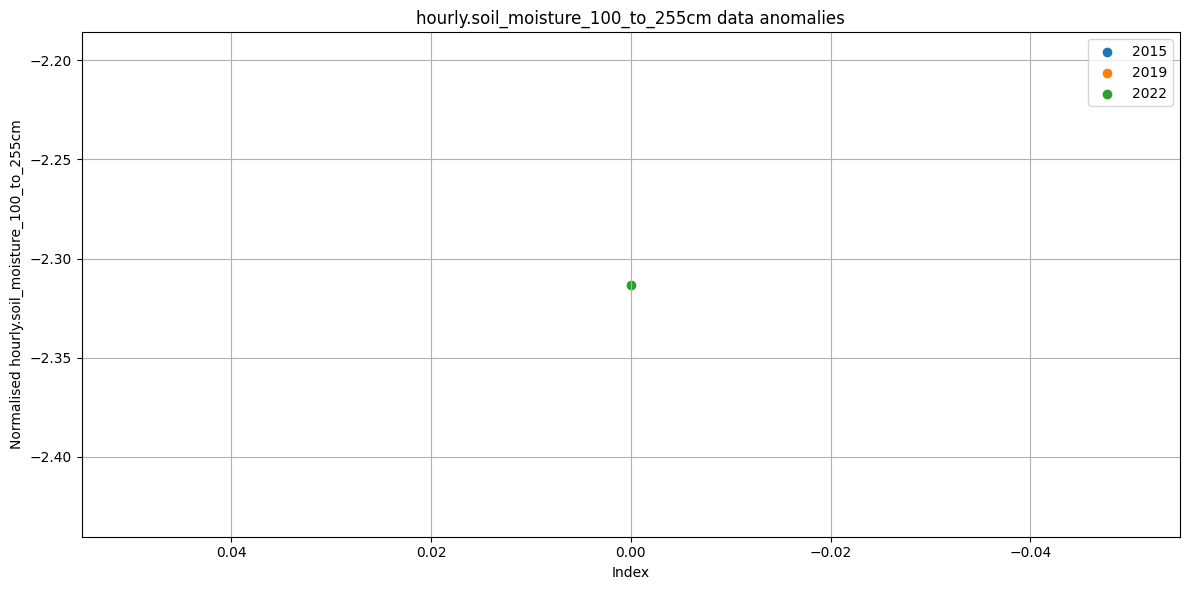

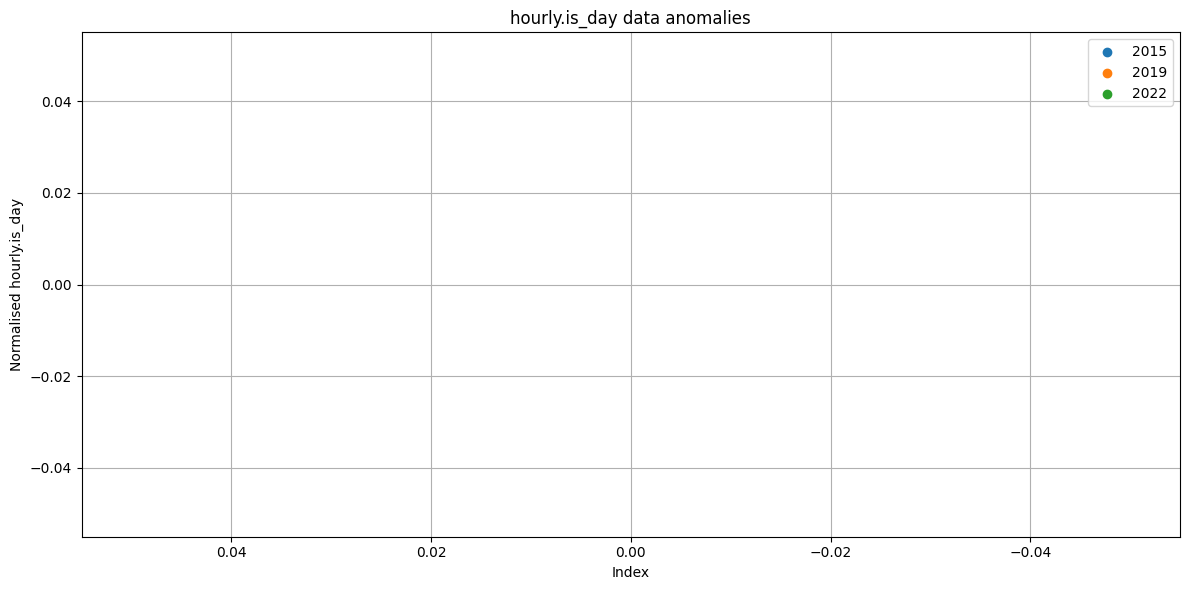

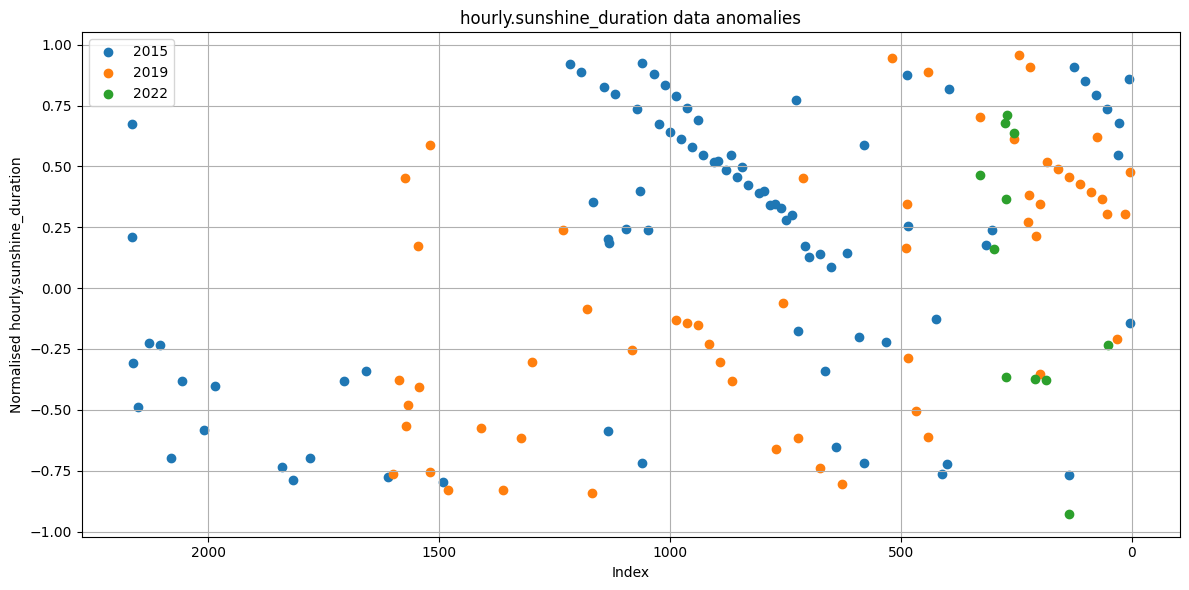

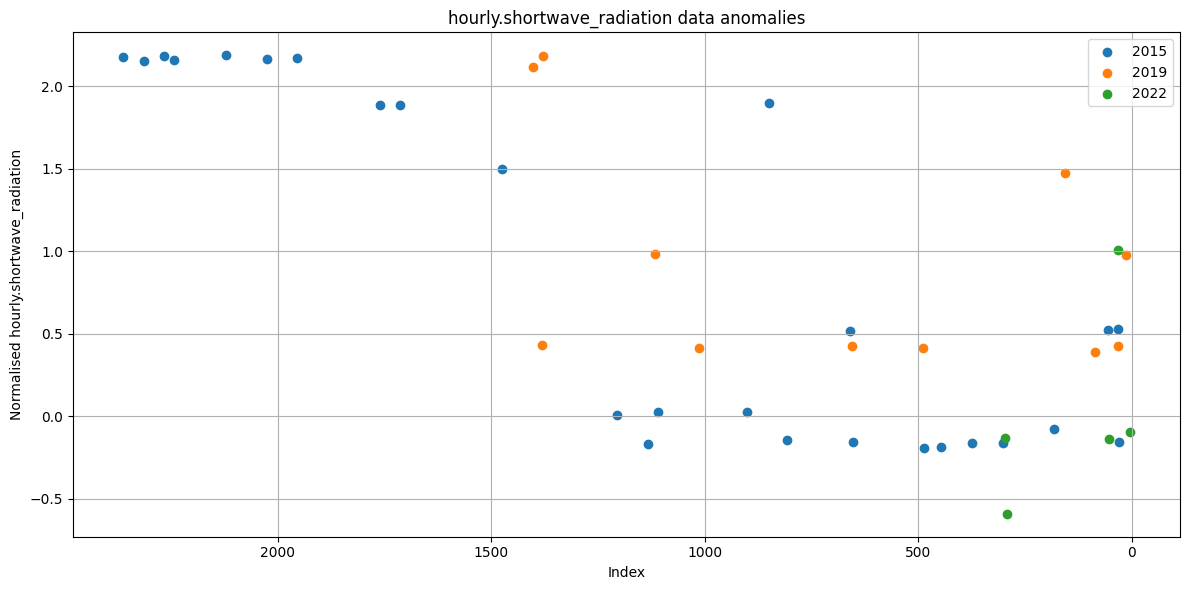

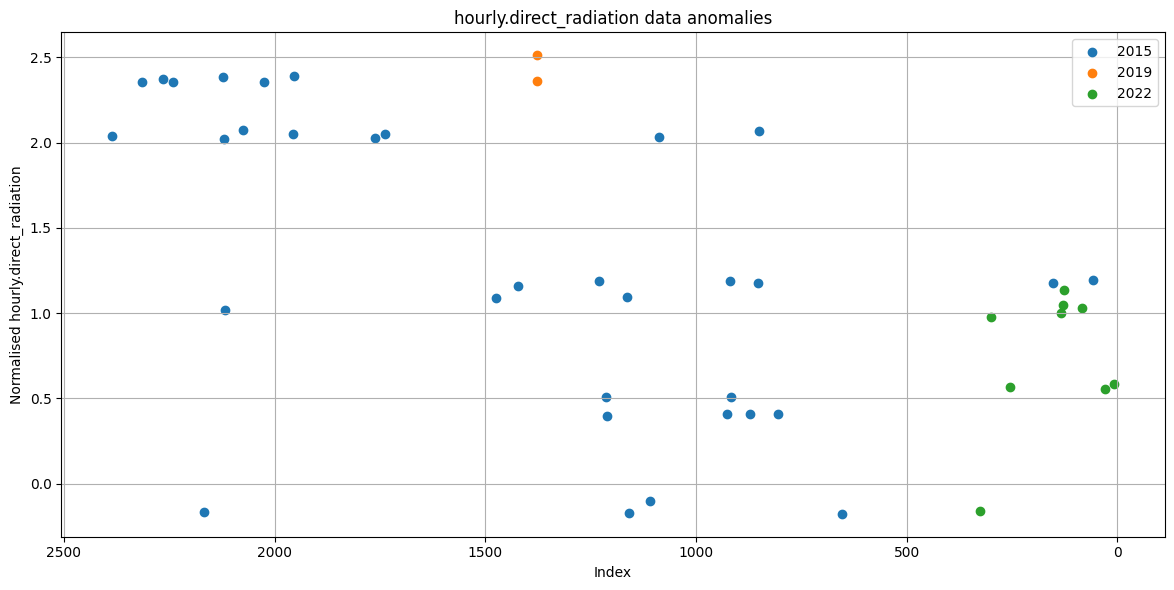

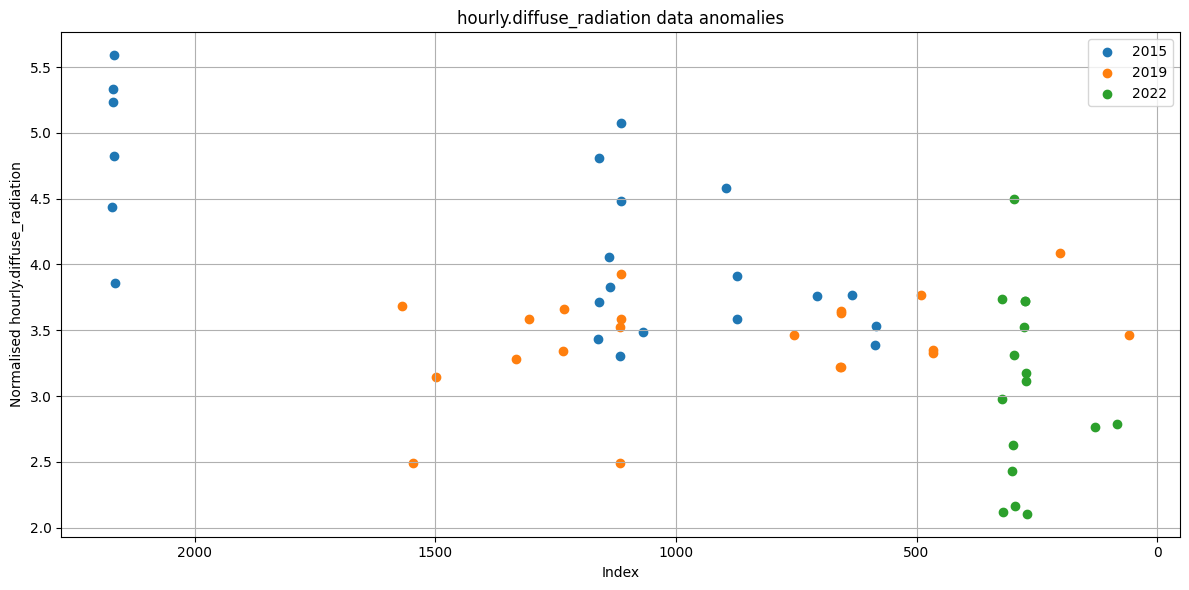

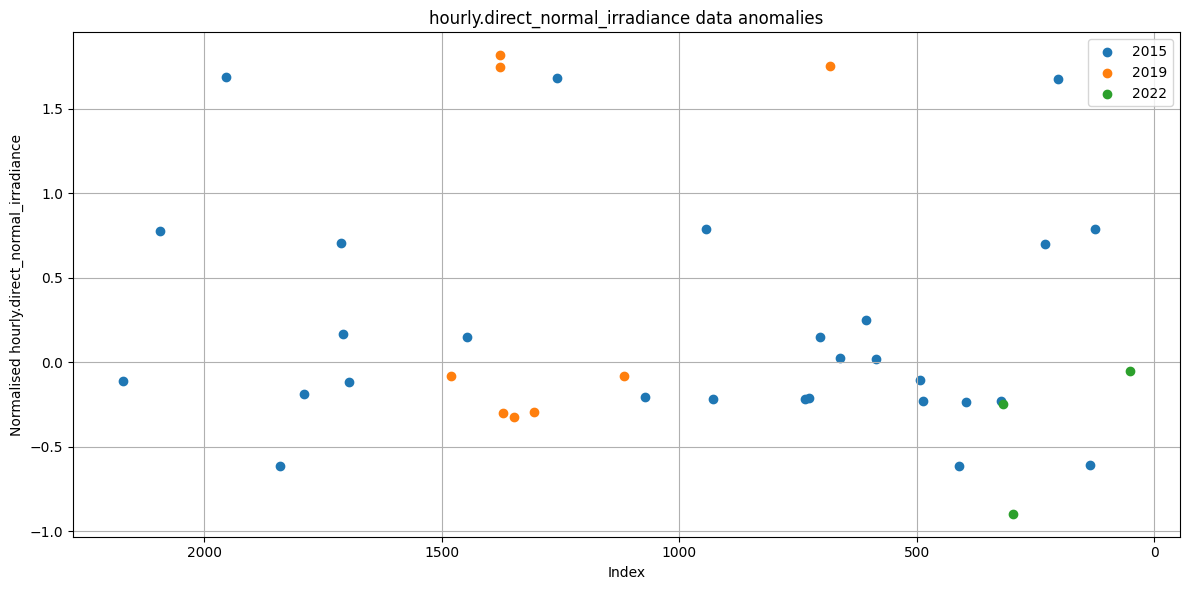

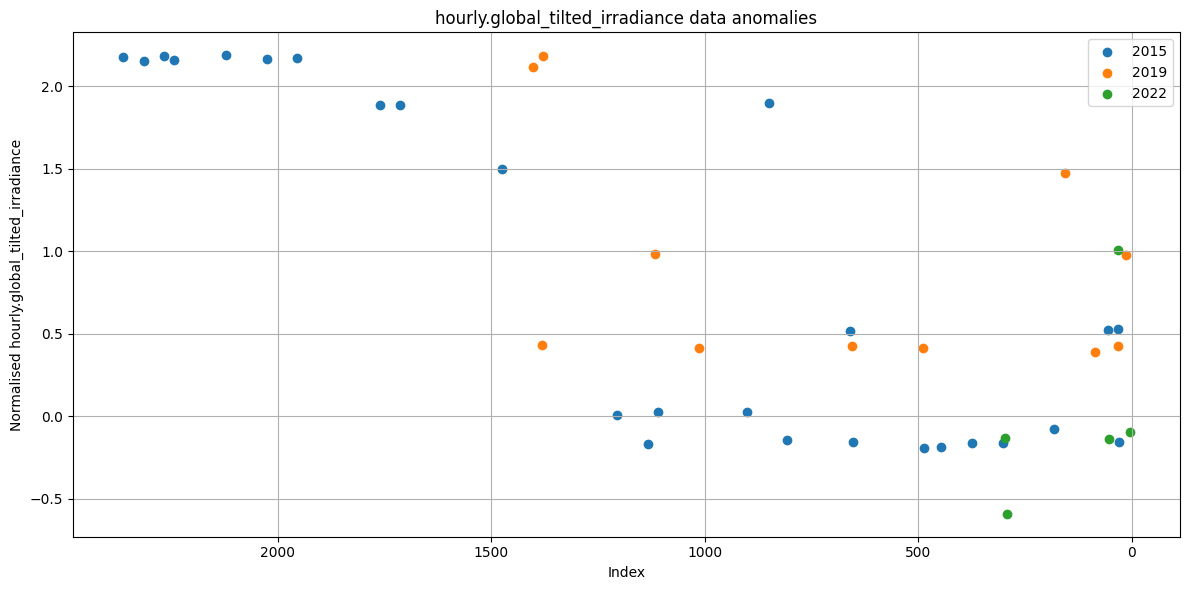

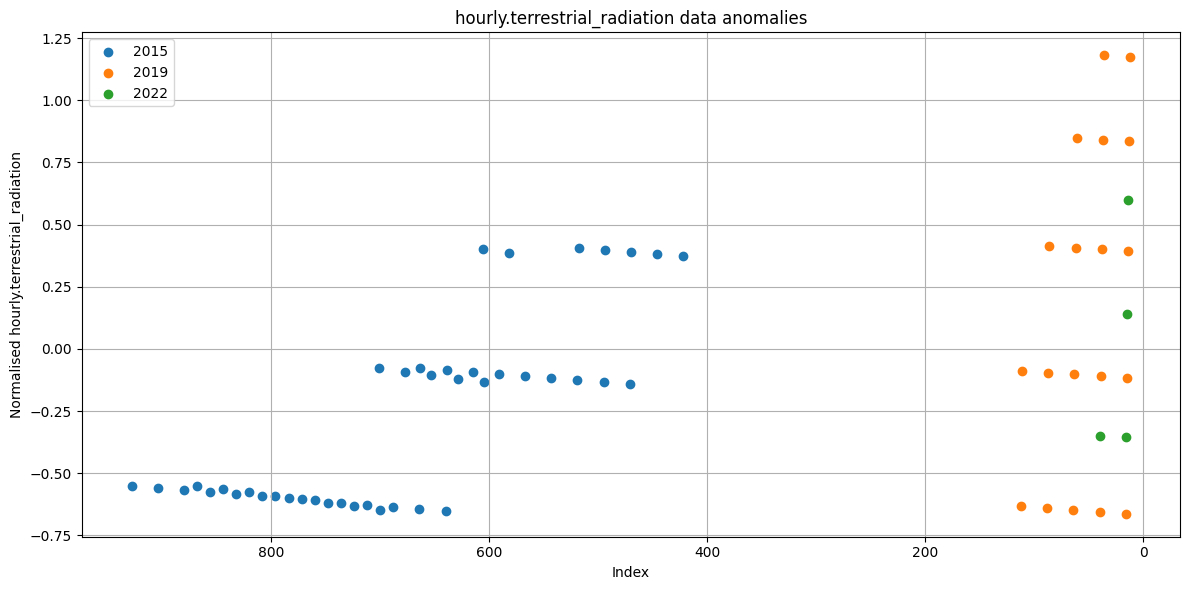

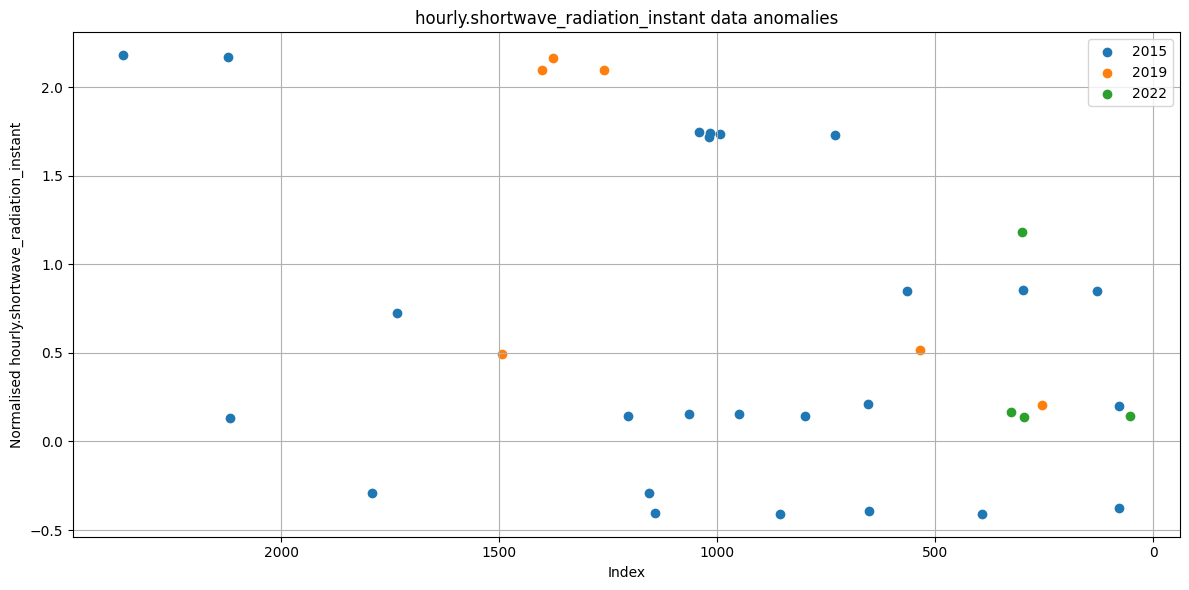

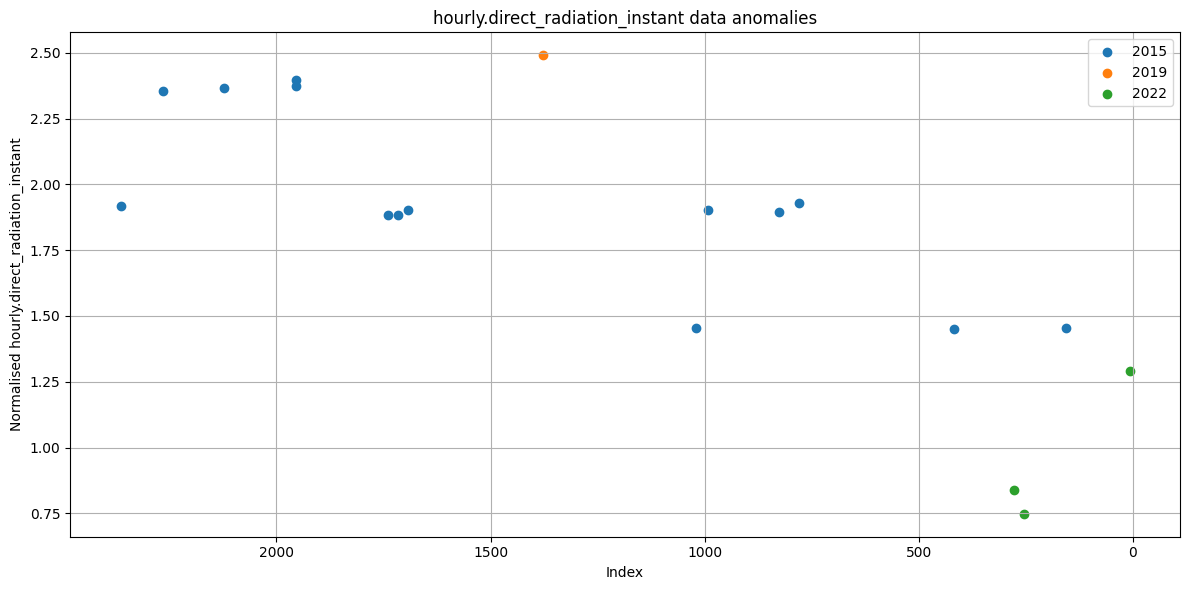

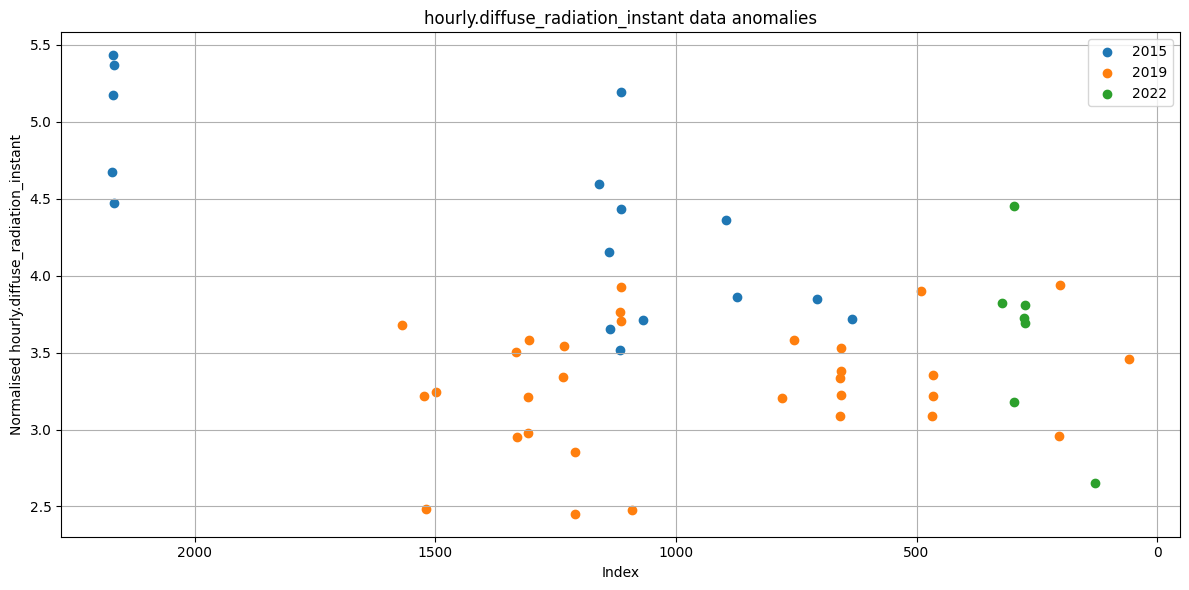

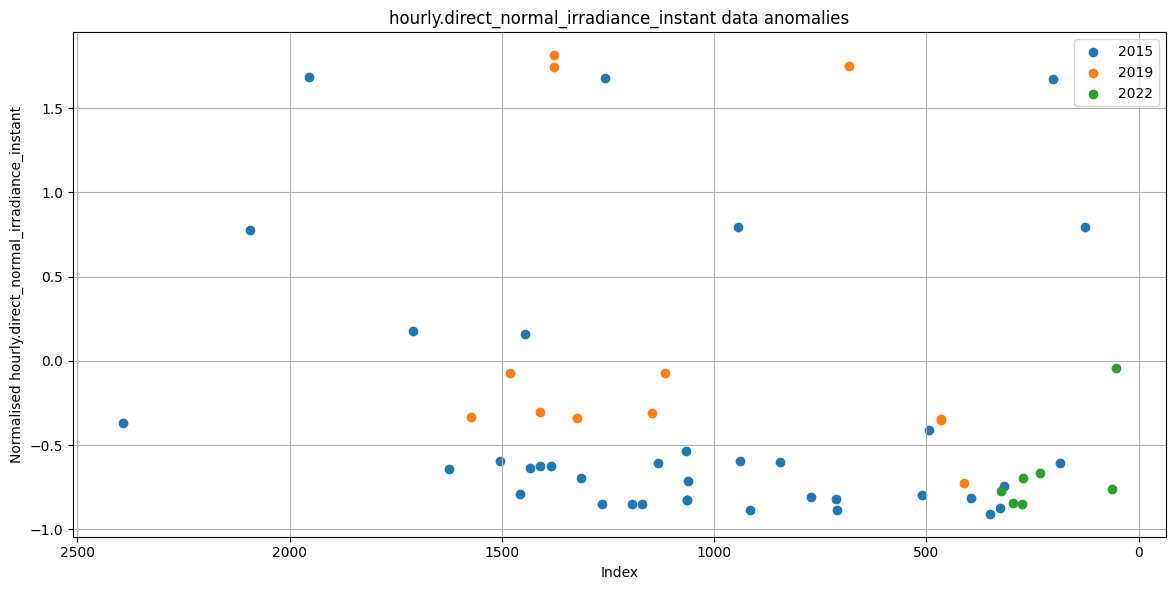

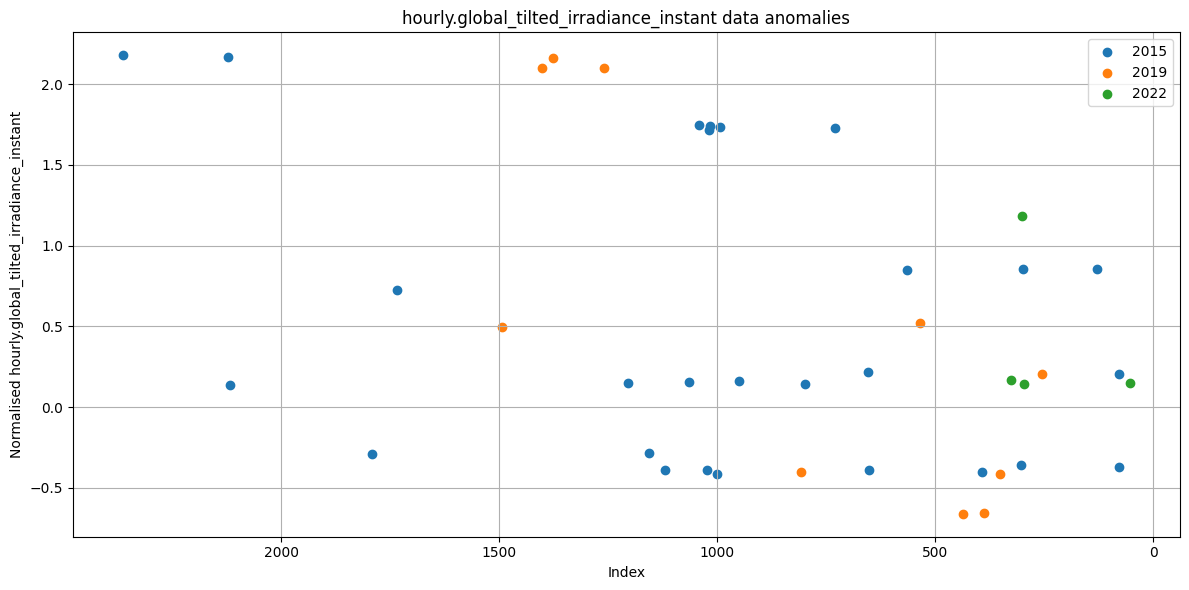

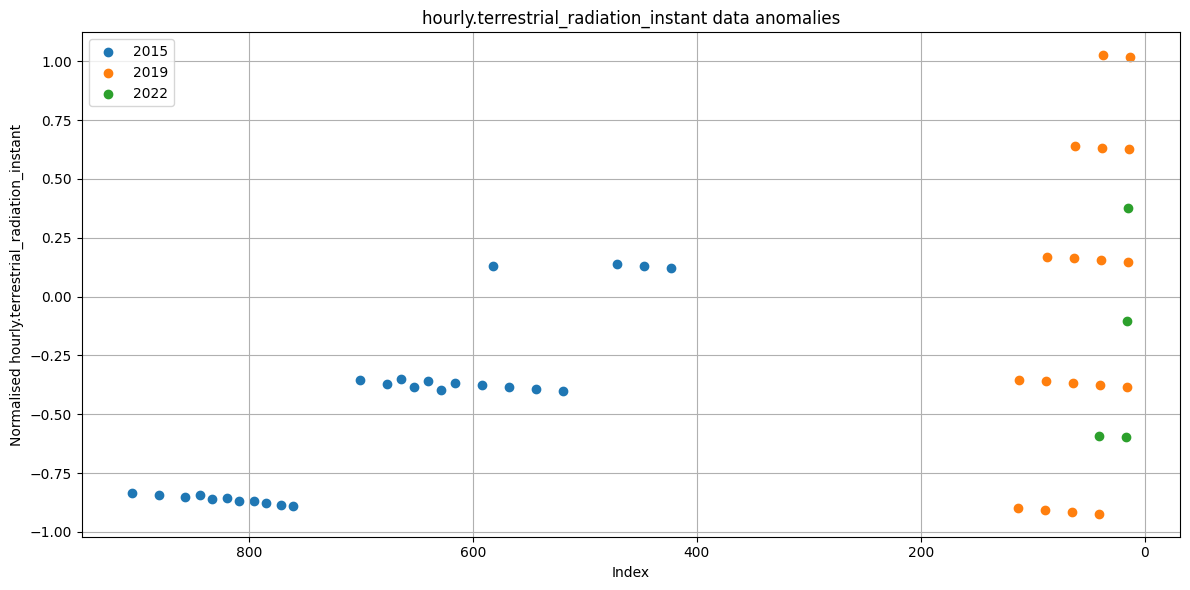

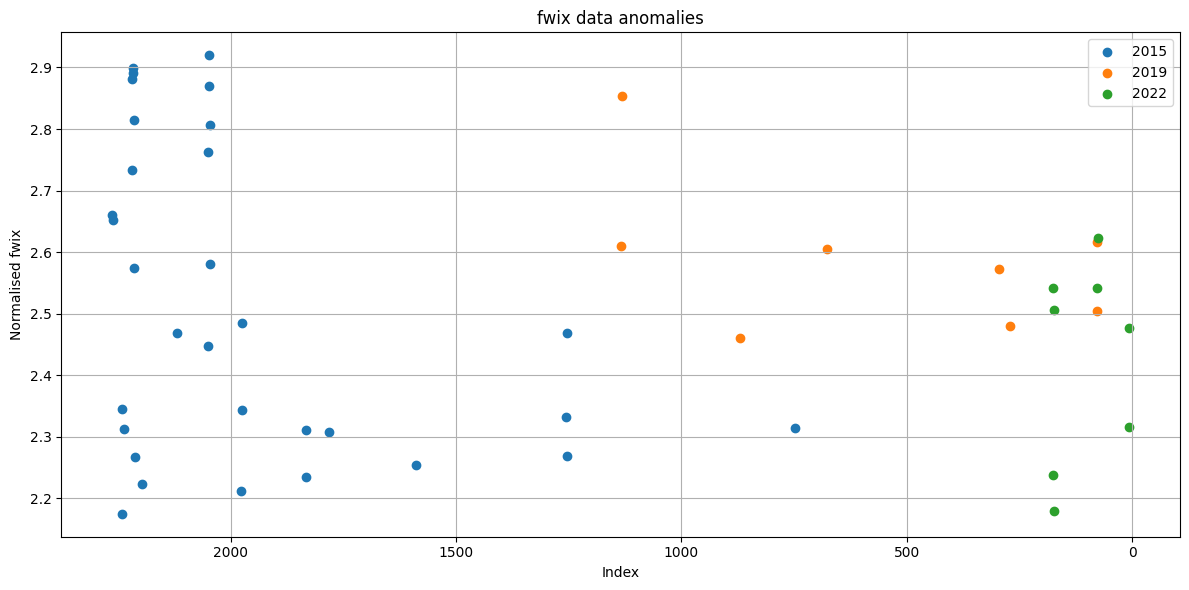

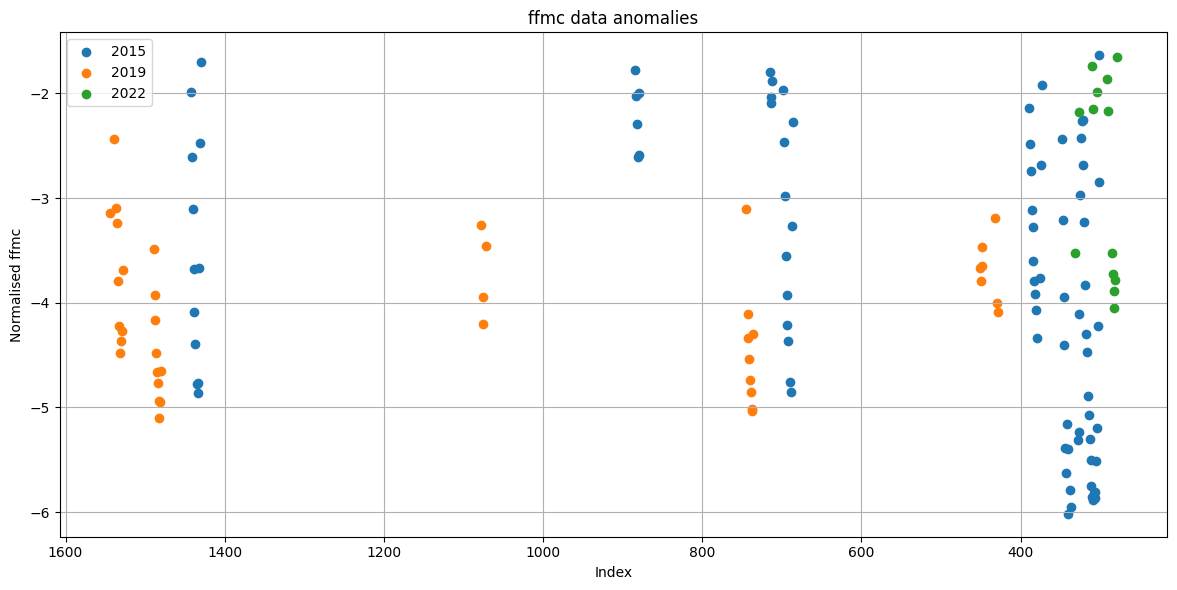

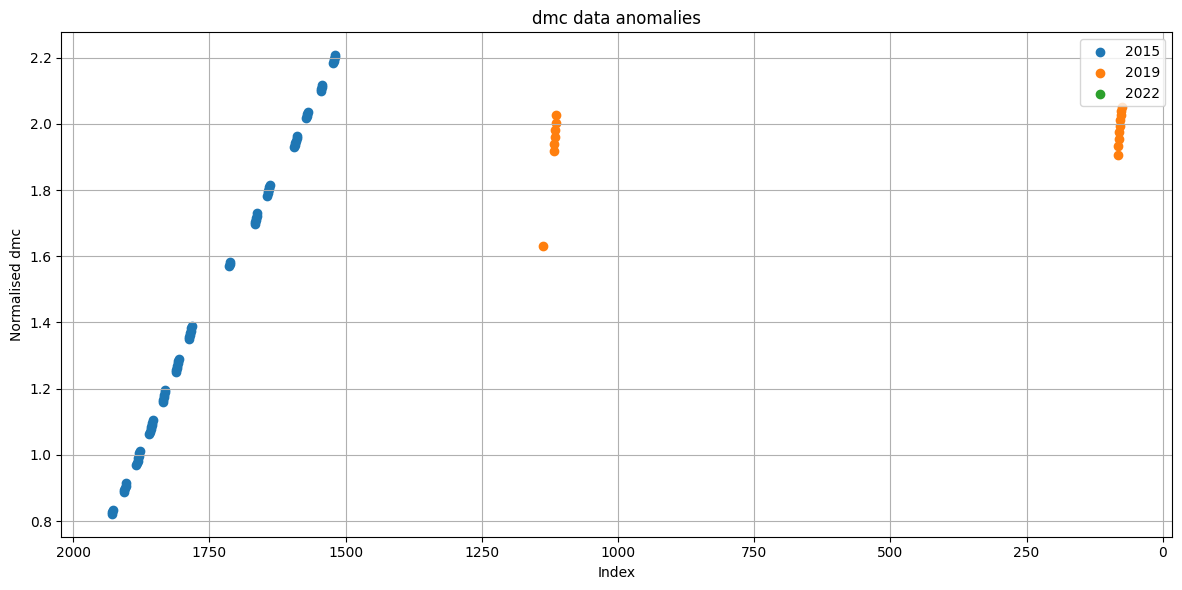

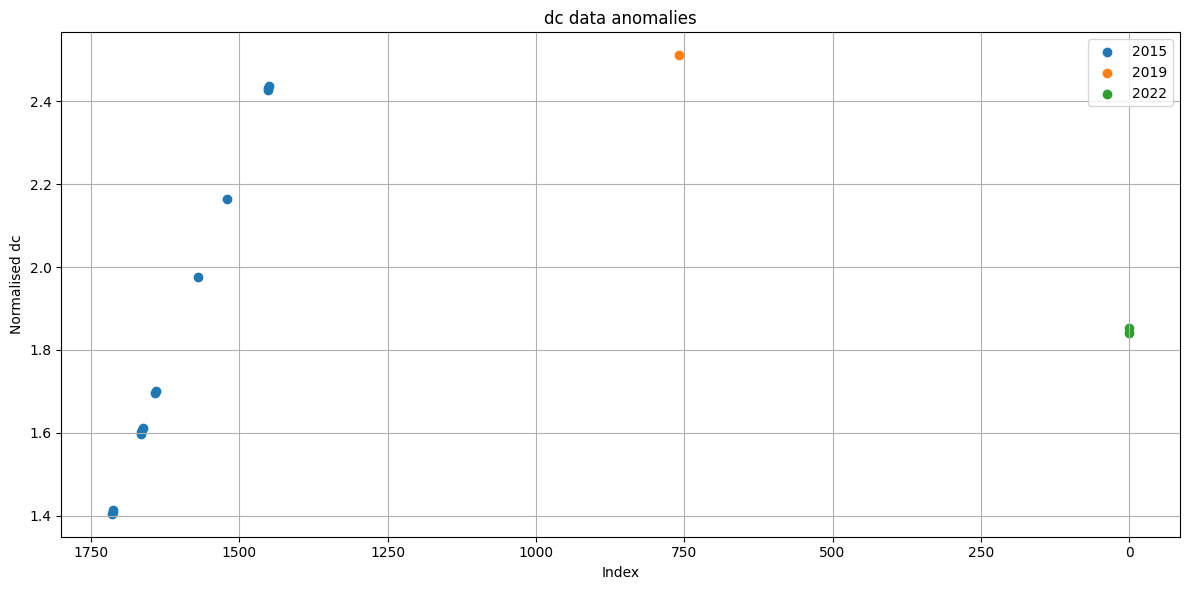

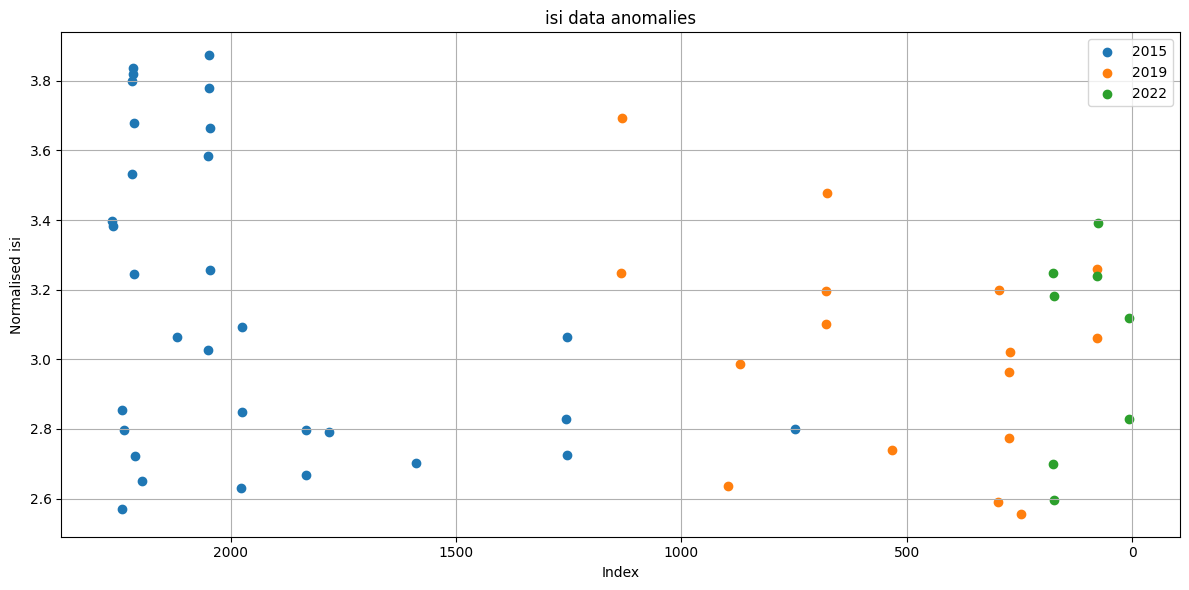

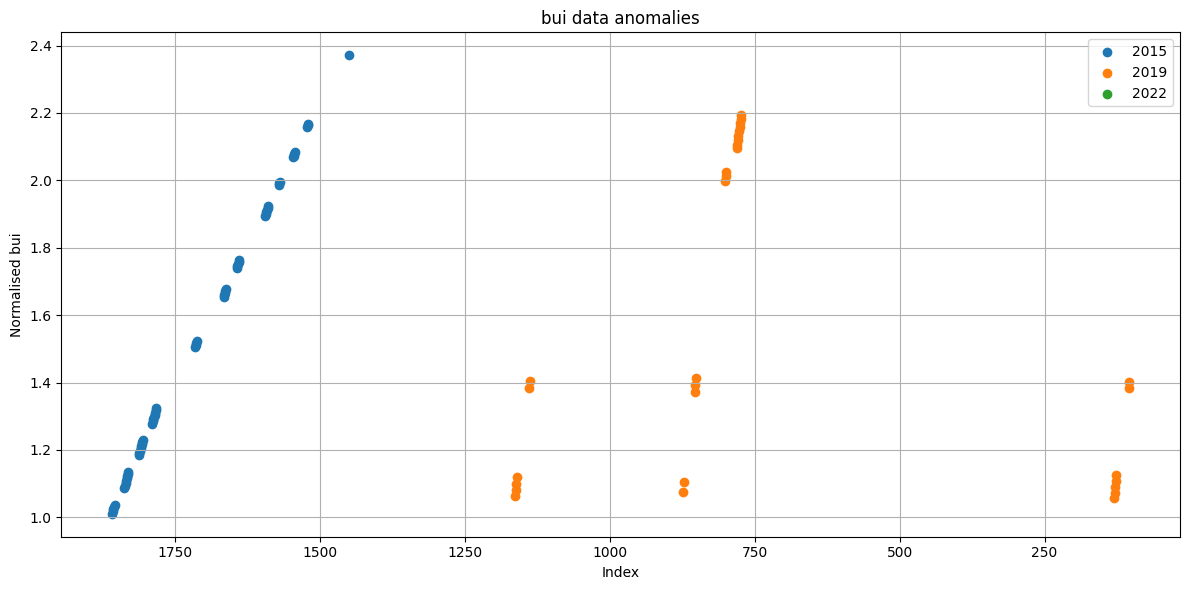

In [18]:
dataframes = {
    '2015': pd.read_csv('i2015.csv'),
    '2019': pd.read_csv('i2019.csv'),
    '2022': pd.read_csv('i2022.csv')
}

vars = ["hourly.temperature_2m",
    "hourly.relative_humidity_2m", "hourly.dew_point_2m", "hourly.apparent_temperature",
    "hourly.precipitation", "hourly.rain", "hourly.snowfall", "hourly.snow_depth",
    "hourly.weather_code", "hourly.pressure_msl", "hourly.surface_pressure",
    "hourly.cloud_cover", "hourly.cloud_cover_low", "hourly.cloud_cover_mid",
    "hourly.cloud_cover_high", "hourly.et0_fao_evapotranspiration",
    "hourly.vapour_pressure_deficit", "hourly.wind_speed_10m", "hourly.wind_speed_100m",
    "hourly.wind_direction_10m", "hourly.wind_direction_100m", "hourly.wind_gusts_10m",
    "hourly.soil_temperature_0_to_7cm", "hourly.soil_temperature_7_to_28cm",
    "hourly.soil_temperature_28_to_100cm", "hourly.soil_temperature_100_to_255cm",
    "hourly.soil_moisture_0_to_7cm", "hourly.soil_moisture_7_to_28cm", "hourly.soil_moisture_28_to_100cm",
    "hourly.soil_moisture_100_to_255cm", "hourly.is_day", "hourly.sunshine_duration", "hourly.shortwave_radiation",
    "hourly.direct_radiation", "hourly.diffuse_radiation", "hourly.direct_normal_irradiance", "hourly.global_tilted_irradiance",
    "hourly.terrestrial_radiation", "hourly.shortwave_radiation_instant", "hourly.direct_radiation_instant",
    "hourly.diffuse_radiation_instant", "hourly.direct_normal_irradiance_instant", "hourly.global_tilted_irradiance_instant",
    "hourly.terrestrial_radiation_instant", "fwix", "ffmc", "dmc", "dc", "isi", "bui"]

for var in vars:
    anomaly_threshold = 3.0 #2.0
    k = 10 #5 #10
    scaler = StandardScaler()
    knn = NearestNeighbors(n_neighbors=k)

    plt.figure(figsize=(12, 6))

    # Iterate over the dictionary of dataframes
    for name, df in dataframes.items():
        temperature_df = df[['index', f'{var}']]
        temperature_df.set_index('index', inplace=True)

        temperature_df = temperature_df.dropna()

        temperature_df[f'{var}'] = scaler.fit_transform(temperature_df[f'{var}'].values.reshape(-1, 1))
        distances, _ = knn.fit(temperature_df[f'{var}'].values.reshape(-1, 1)).kneighbors(temperature_df[f'{var}'].values.reshape(-1, 1))
        mean_distances = distances.mean(axis=1)
        z_scores = (mean_distances - mean_distances.mean()) / mean_distances.std()
        anomalies = temperature_df[z_scores > anomaly_threshold]
        plt.scatter(anomalies.index, anomalies[f'{var}'], label=name)

    plt.xlabel('Index')
    plt.ylabel(f'Normalised {var}')
    plt.title(f'{var} data anomalies')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.gca().invert_xaxis()

    plt.savefig(f'Sample_{var}_{anomaly_threshold}_k{k}.png')
    plt.show()